## Analyzing the Factors that Won Counter-Strike 2 Rounds at IEM Dallas 2025

### Background

Counter-Strike 2 (CS2) is a first-person shooter esports game made by Valve Corporation. The game is divided into many rounds, where teams play either the Terrorists (T) who try to plant a bomb on a specific parts of the map ("bombsites"), and the Counter-Terrorists (CT) who try to defuse the bomb or kill the terrorists.

<div>
<center><img src="assets/game_screenshot.jpg" width="500"/><br /><b>Sample in-game screenshot of Counter-Strike 2</b></center>
</div>

Teams play 12 rounds on each side (sometimes called "regulation time"), and the first team to get 13 rounds won, wins the game. If both teams reach 12 rounds won, then the game goes into "overtime" (OT), and additional 3 rounds are added to each side, meaning a team wins in overtime if 4 rounds are won. If both teams win 3 rounds in overtime, the game goes into another overtime infinitely until a team wins 4 times in overtime.

At the start of team round, all players get a specific amount of money that can be used to buy various guns and grenades. The grenades, also known as utilities, can be used by players to get information, or for taking control over parts of the map.

<center>
<table>
    <tr>
        <td>
            <center><img src="assets/flashbang.jpg" width="320"/><br /><b>Flashbang</b></center>
        </td>
        <td>
            <center><img src="assets/smoke.jpg" width="320"/><br /><b>Smoke Grenade</b></center>
        </td>
    </tr>
    <tr>
        <td>
            <center><img src="assets/henade.jpg" width="320"/><br /><b>High Explosive Grenade</b></center>
        </td>
        <td>
            <center><img src="assets/molotov.jpg" width="320"/><br /><b>Molotov</b></center>
        </td>
    </tr>
</table>
</center>


The game has developed a competitive esports scene over both it and its prequel, Counter-Strike: Global Offensive's lifetime. Valve Corporation, as well as other entities such as ESL (Electronic Sports League), PGL and Blast, maintain several tourament circuits around the world. We wanted to analyze different factors about how professional CS2 players play. To do this, we are analyzing games played from a single CS2 tournament, and chose ESL's IEM Dallas 2025 due to its recency at the time of writing and its prestige within the Counter-Strike community.

<center><img src="assets/esports.jpg" width="500" /><br /><b>IEM Dallas 2025 Finals (credit: ESL)</b></center>

# Research Question
What are the most prevalent factors that contribute to winning games (maps) of Counter-Strike 2?

## Dataset Description

Our data contains information about the games played during IEM Dallas 2025. It is split across four CSV files: `demos.csv`, `players.csv`, `teams.csv` and `matches.csv`.
Data was scraped from [HLTV.org](https://hltv.org), a widely-used site in the Counter-Strike community that has detailed data
about team and player history, as well as hosts replay files for all esports matches that can be used to get detailed
information about the events that happened in a particular game of Counter-Strike

`demos.csv` contains the bulk of our data, and contains specifically data about how the players played for each map (game) of the tournament.

`players.csv` contains information about the players at the tournament, including some data about their career.

`teams.csv` contains information about the team standings at the tournament.

`matches.csv` contains a list of matches and games that were played at the tournament, along with their HLTV links.

## Structure of the Data

### `demos.csv`

Each row in this file contains the statistics of each player in the game, per round. Each column is an attribute of the players per round

Number of observations: 14280

- `match_id` (int) - Unique ID of the match played
- `map_id` (int) - Unique ID of the map played
- `round_id` (int) - Unique ID of the map played
- `team_name` (string) - Name of the team
- `map_name` (string) - Name of map the round was played on
- `round_number` (int) - The 1-indexed order of the round played in the map (game)
- `round_ct_team` (string) - Team name of the team that is on the CT (Counter-Terrorist) side
- `round_first_site_hit` (A' | 'B') - First bombsite that a team set foot in during a round
- `round_site_hit_time` (float64) - Time it takes for a team to reach a bombsite
- `round_bomb_plant_site` (A' | 'B') - The site where bomb was planted. Null if bomb was not planted.
- `player_planted_bomb` (float64) - The site where bomb was planted. Null if bomb was not planted.
- `round_bomb_plant_time` (float64) - Time since round start that the bomb was defused (in seconds)
- `round_bomb_defuser` (bool) - True if the player defused the bomb, False otherwise
- `bomb_defuse_time` (float64) - Time since round start that the bomb was defused (in seconds)
- `round_length` (float64) - Length of the round (in seconds)
- `round_result` ('T' | 'CT') - Team that won the round
- `round_timeout_called_before` (string) - Team that called timeout before the round. Null if no timeout was called
- `player_name` (string) - Name of player
- `player_flashes_used` (int) - Number of flashbangs the player used in the round
- `player_smokes_used` (int) - Number of smoke grenades the player used in the round
- `player_grenades_used` (int) - Number of explosive grenades the player used in the round
- `player_molotovs_used` (int) - Number of molotovs the player used in the round
- `player_incendiaries_used` (int) - Number of incendiary grenades the player used in the round
- `player_kills` (int) - Number of kills a player got in the round
- `player_died` (bool) - True if the player died in the round
- `player_spent_amount` (int) - Amount of money a player spent in the round
- `player_loadout` (string) - Items a player has in their inventory at the start of the round, deliminated by `, `
- `player_damage` (float64) - Amount of damage a player dealt in the round
- `round_first_killer` (bool) - True if the player drew first blood (first kill) in the round
- `round_first_death` (bool) - True if the player is the first person to die in the round
- `player_headshots` (int) - Number of headshots made by player in a round
- `player_upperbodyshots` (int) - Number of upper body (neck, chest, right_arm, left_arm) shots made by player a round
- `player_stomachshots` (int) - Number of stomach shots made by player a round
- `player_legshots` (string) - Number of leg shots made by player

### `players.csv`

Each row in this file is a player that played in the tournament. Each column refers to an attribute about the players

Number of observations: 80

- `playerid` (int) - Unique ID of the player
- `name` (string) - Name of the player
- `team` (string) - Team name of the player
- `proplayer_since_month` (Month) - Month that the player played on their first team
- `proplayer_since_year` (int) - Year that the player played on their first team
- `on_team_since_month` (Month) - Month that the player played on their current team
- `on_team_since_year` (int) - Year that the player played on their current team
- `is_stand_in` (bool) - True if the player is a stand-in (not officially on roster)
- `has_changed_teams` (bool) - True if the player has changed teams at any point in their career

### `matches.csv`

Each row in this file is a game played in the tournament. Each column is an attribute for the matches

Number of observations: 71

- `matchid` (int) - Unique ID of the player
- `mapid` (int) - Unique ID of the game (map) played
- `team1` (string) - First team of the match
- `team2` (string) - Second team of the match
- `url` (string) - HLTV URL of the match
- `map` (string) - Map the game was played on

### `teams.csv`

Each row in this file is a team that played in the tournament. Each column is an attribute for the teams

Number of observations: 16

- `team_name` (string) - Name of the team
- `tournament_place` (int) - Placement of the team in IEM Dallas 2025


## Data Gathering

For our data gathering, we downloaded replay (demo) files for all games played during IEM Dallas 2025 from HLTV.org, a website that is considered to be the most comprehensive database of Counter-Strike esports data. The files we downloaded ended up being 71 games total. In order to parse these replay files, we used a library called [`demoparser2`](https://github.com/LaihoE/demoparser). This library allows us to read demo files and parse information such as game events, game ticks, and player information.

We created a script called `read_demo.py` that takes in a demo file and creates a CSV file with various statistics for each round and player. We then combine these CSV files with another script called `join_csv.py`. While testing the script, we realized that some games were split into multiple demo files, which were harder to parse, and in the end, we decided to drop these games as these were only 3 out of our entire set.

Another issue we encountered was that our initial `read_demo.py` script incorrectly parsed the side (T or CT) that a team was on, so we had to make a second `get_round_sides.py` script that we used to generate a CSV that was then used to patch the original CSV file we generated.

In addition to the main CSV file, we also manually scraped `matches.csv` and `players.csv` files to augment the information for our analysis. The data for both of these files come from HLTV.org's public data about players and tournaments, and were manually copied into Google Sheets before exporting as CSV.

In summary, the following implications should be noted:
- Some games were dropped due to difficulties in parsing data from split demo files.
- For player inventories, there are times that the player only had their knife, and no guns at the tick the inventory check was done. Checking the demo file in game showed that the player had dropped their gun at this time.
- One of the demos, match `25` game `60`, had an issue where the warmup of the players was included as a "0th round", leading to potential issues about the round number.



# Recreating our Data

To recreate our data, go to all HLTV links in `matches.csv` and click on "Demo Sponsored by BitSkins" to download demos.

Install `demoparser2` by running `pip install demoparser2`

Extract the files and rename each to the convention of `<matchid>_<mapid>.dem`.

For each file, run the following command:
```bash
python read_demo.py /path/to/demo.dem
```

In addition, run:
```bash
python get_round_sides.py
```

Move all of the `.dem.csv` files that were generated to a folder called `csv`. Then, in the directory where `csv` is, run:

```bash
python join_csv.py
```

# Data Cleaning

### Import Libraries and Tables

In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
import adjustText as at
from adjustText import adjust_text

demos = pd.read_csv("demos.csv")
matches = pd.read_csv("matches.csv")
players = pd.read_csv("players.csv")
teams = pd.read_csv("teams.csv")

### Team Names

If we read the list of team names in the `players.csv`, `teams.csv` and `demos.csv` files, they differ from each other:

In [3]:
teams_team_names = sorted(teams['team_name'].unique())
demos_team_names = sorted(demos['team_name'].unique())
players_team_names = sorted(players['team'].unique())

pd.DataFrame({
    'teams': teams_team_names,
    'demos': demos_team_names,
    'players': players_team_names
})

,teams,demos,players
0,3DMAX,3DMAX,3DMAX
1,Aurora,Aurora,Aurora
2,BC.Game,BCG,BC.Game
3,FURIA,FURIA,FURIA
4,FaZe,FaZe Clan,FaZe
5,Falcons,G2 Esports,Falcons
6,G2,GamerLegion,G2
7,GamerLegion,HEROIC,GamerLegion
8,HEROIC,LEGACY,HEROIC
9,Legacy,Lynn Vision Gaming,Legacy


Both the `teams.csv` and `players.csv` team names are the same, but the ones in `demos.csv` are different.
We will replace the values in `players.csv` and `teams.csv` since they are smaller files, for performance reasons.

First, we get the differences:

In [4]:
union_ser = pd.Series(np.union1d(teams_team_names, demos_team_names))
intersection_ser = pd.Series(np.intersect1d(teams_team_names, demos_team_names))
differences = union_ser[~union_ser.isin(intersection_ser)]

differences

2                BC.Game
3                    BCG
5                   FaZe
6              FaZe Clan
7                Falcons
8                     G2
9             G2 Esports
12                LEGACY
13                Legacy
14                Liquid
15           Lynn Vision
16    Lynn Vision Gaming
19          Team Falcons
20           Team Liquid
21         Team Vitality
23              Vitality
dtype: object

From here, we can see the following that need to change:

- `BC.Game` -> `BCG`
- `FaZe` -> `FaZe Clan`
- `Falcons` -> `Team Falcons`
- `G2` -> `G2 Esports`
- `Legacy` -> `LEGACY`
- `Liquid` -> `Team Liquid`
- `Lynn Vision` -> `Lynn Vision Gaming`
- `Vitality` -> `Team Vitality`

Now we can fix this:

In [5]:
teams['team_name'] = teams['team_name'].replace('BC.Game', 'BCG')
teams['team_name'] = teams['team_name'].replace('FaZe', 'FaZe Clan')
teams['team_name'] = teams['team_name'].replace('Falcons', 'Team Falcons')
teams['team_name'] = teams['team_name'].replace('G2', 'G2 Esports')
teams['team_name'] = teams['team_name'].replace('Legacy', 'LEGACY')
teams['team_name'] = teams['team_name'].replace('Liquid', 'Team Liquid')
teams['team_name'] = teams['team_name'].replace('Lynn Vision', 'Lynn Vision Gaming')
teams['team_name'] = teams['team_name'].replace('Vitality', 'Team Vitality')

players['team'] = players['team'].replace('BC.Game', 'BCG')
players['team'] = players['team'].replace('FaZe', 'FaZe Clan')
players['team'] = players['team'].replace('Falcons', 'Team Falcons')
players['team'] = players['team'].replace('G2', 'G2 Esports')
players['team'] = players['team'].replace('Legacy', 'LEGACY')
players['team'] = players['team'].replace('Liquid', 'Team Liquid')
players['team'] = players['team'].replace('Lynn Vision', 'Lynn Vision Gaming')
players['team'] = players['team'].replace('Vitality', 'Team Vitality')

Now, we check for differences:

In [6]:
teams_team_names = teams['team_name'].unique()
demos_team_names = demos['team_name'].unique()
players_team_names = players['team'].unique()

union_ser = pd.Series(np.union1d(teams_team_names, demos_team_names))
intersection_ser = pd.Series(np.intersect1d(teams_team_names, demos_team_names))
differences = union_ser[~union_ser.isin(intersection_ser)]

len(differences)

0

As you can see, there are no more differences.

### Player Names

If we read the list of player names in the `players.csv` and `demos.csv` files, they differ from each other:


In [7]:
demos_player_names = demos['player_name'].unique()
players_player_names = players['name'].unique()

union_ser = pd.Series(np.union1d(players_player_names, demos_player_names))
intersection_ser = pd.Series(np.intersect1d(players_player_names, demos_player_names))
differences = union_ser[~union_ser.isin(intersection_ser)]

differences

0           910
1          910-
11     HeavyGoD
12     HeavyGod
22       Mzinho
29       Skullz
36       Techno
37     Techno4K
39    Westmelon
63       mzinho
74       skullz
78    westmelon
84         z4KR
85         z4kr
dtype: object

To determine which names are equivalent to which, we make a DataFrame:

In [8]:
demos_player_names = pd.Series(demos['player_name'].unique())
players_player_names = pd.Series(players['name'].unique())

demos_player_names = demos_player_names[demos_player_names.isin(differences)]
players_player_names = players_player_names[players_player_names.isin(differences)]

pd.DataFrame({'demos': demos_player_names, 'players': players_player_names})

,demos,players
7,Skullz,NaN
17,NaN,Techno
18,NaN,mzinho
19,NaN,910
33,NaN,HeavyGod
50,HeavyGoD,NaN
51,NaN,skullz
52,z4KR,NaN
56,westmelon,NaN
62,NaN,Westmelon


From here, we can see the following that need to change:

- `910` -> `910-`
- `HeavyGod` -> `HeavyGoD`
- `mzinho` -> `mzinho`
- `skullz` -> `Skullz`
- `Techno` -> `Techno4K`
- `Westmelon` -> `westmelon`
- `z4kr` -> `z4KR`

Now we can fix this:

In [9]:
players['name'] = players['name'].replace('910', '910-')
players['name'] = players['name'].replace('HeavyGod', 'HeavyGoD')
players['name'] = players['name'].replace('mzinho', 'Mzinho')
players['name'] = players['name'].replace('skullz', 'Skullz')
players['name'] = players['name'].replace('Techno', 'Techno4K')
players['name'] = players['name'].replace('Westmelon', 'westmelon')
players['name'] = players['name'].replace('z4kr', 'z4KR')

In [10]:
demos_player_names = demos['player_name'].unique()
players_player_names = players['name'].unique()

union_ser = pd.Series(np.union1d(players_player_names, demos_player_names))
intersection_ser = pd.Series(np.intersect1d(players_player_names, demos_player_names))
differences = union_ser[~union_ser.isin(intersection_ser)]

len(differences)

0

Now we can see there are no differences.

## Player loadouts

Player loadouts are encoded as comma-separated lists, so we turn it into an array. In addition, we need to remove knives,
as it is impossible to drop knives in the game, and different knife skins (cosmetics) are counted as unique items rather
than the same one, even if there is no gameplay effect.

First, we convert to list and get a list of knives:

In [11]:
demos['player_loadout_array'] = demos['player_loadout'].str.split(', ')
unique_items = demos['player_loadout_array'].explode().unique().tolist()
knives = [i for i in unique_items if
          "knife" in i.lower() or
          "daggers" in i.lower() or
          "bayonet" in i.lower() or
          "karambit" in i.lower()]

knives

['Butterfly Knife',
 'Talon Knife',
 'M9 Bayonet',
 'Karambit',
 'Shadow Daggers',
 'Skeleton Knife',
 'Flip Knife',
 'Bayonet',
 'Survival Knife',
 'Nomad Knife',
 'Stiletto Knife',
 'knife_t',
 'knife',
 'Ursus Knife']

Now, we filter:

In [12]:
demos['player_loadout_array'] = demos['player_loadout_array'].apply(lambda l: [i for i in l if i not in knives])
demos['player_loadout_array'].head(10)

0              [Glock-18, C4 Explosive]
1    [Glock-18, Smoke Grenade, Molotov]
2                            [Glock-18]
3      [P250, Smoke Grenade, Flashbang]
4                               [USP-S]
5                [P2000, Smoke Grenade]
6                       [Dual Berettas]
7                               [USP-S]
8                    [USP-S, Flashbang]
9                            [Glock-18]
Name: player_loadout_array, dtype: object

## Removing problematic game

As mentioned before, match `25` game `60` was erroneously encoded by the tournament organizers, leading to potential problems with the data.

In [13]:
demos = demos[demos['map_id'] != 60]

## Exploratory Data Analysis

For our EDA, we will be exploring the different key metrics for each team, each member, and each map.

In [14]:
demos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14070 entries, 0 to 14279
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   match_id                     14070 non-null  int64  
 1   map_id                       14070 non-null  int64  
 2   round_id                     14070 non-null  int64  
 3   team_name                    14070 non-null  object 
 4   map_name                     14070 non-null  object 
 5   round_number                 14070 non-null  int64  
 6   round_ct_team                14070 non-null  object 
 7   round_first_site_hit         8120 non-null   object 
 8   round_site_hit_time          8120 non-null   float64
 9   round_bomb_plant_site        7350 non-null   object 
 10  player_planted_bomb          14070 non-null  bool   
 11  round_bomb_plant_time        7350 non-null   float64
 12  round_bomb_defuser           14070 non-null  bool   
 13  bomb_defuse_time     

In [15]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   team_name         16 non-null     object
 1   tournament_place  16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 388.0+ bytes


In [16]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   matchid  71 non-null     int64 
 1   mapid    71 non-null     int64 
 2   team1    71 non-null     object
 3   team2    71 non-null     object
 4   url      71 non-null     object
 5   map      71 non-null     object
dtypes: int64(2), object(4)
memory usage: 3.5+ KB


In [17]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   playerid               80 non-null     int64 
 1   name                   80 non-null     object
 2   team                   80 non-null     object
 3   proplayer_since_month  80 non-null     object
 4   proplayer_since_year   80 non-null     int64 
 5   on_team_since_month    80 non-null     object
 6   on_team_since_year     80 non-null     int64 
 7   is_stand_in            80 non-null     bool  
 8   has_changed_teams      80 non-null     bool  
dtypes: bool(2), int64(3), object(4)
memory usage: 4.7+ KB


### Teams - Exploratory Data Analysis
#### EDA Question #1: What observations can be formed from the visualizations of the metrics of each team?

Total Matches

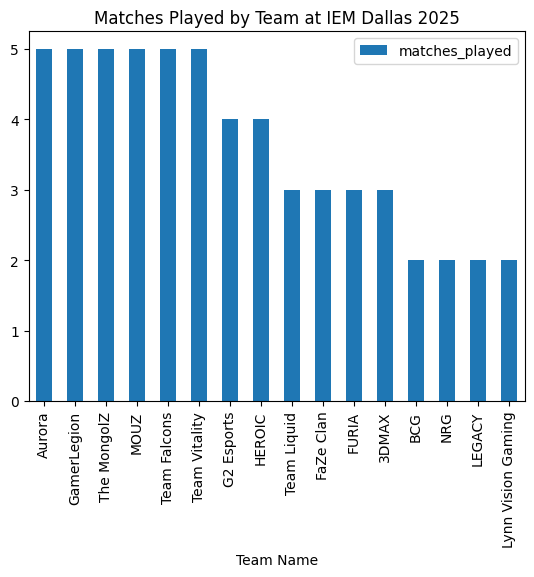

In [18]:
matches_per_team = demos.groupby('team_name')['match_id'].nunique().to_frame().reset_index()
matches_per_team.columns = ['team_name', 'matches_played']

matches_per_team = matches_per_team.sort_values(by='matches_played', ascending=False)

matches_per_team.plot.bar(x='team_name', y='matches_played', rot=90, title='Matches Played by Team at IEM Dallas 2025')

plt.pyplot.xlabel('Team Name')
plt.pyplot.show()

Total Rounds

Text(0.5, 0, 'Team Name')

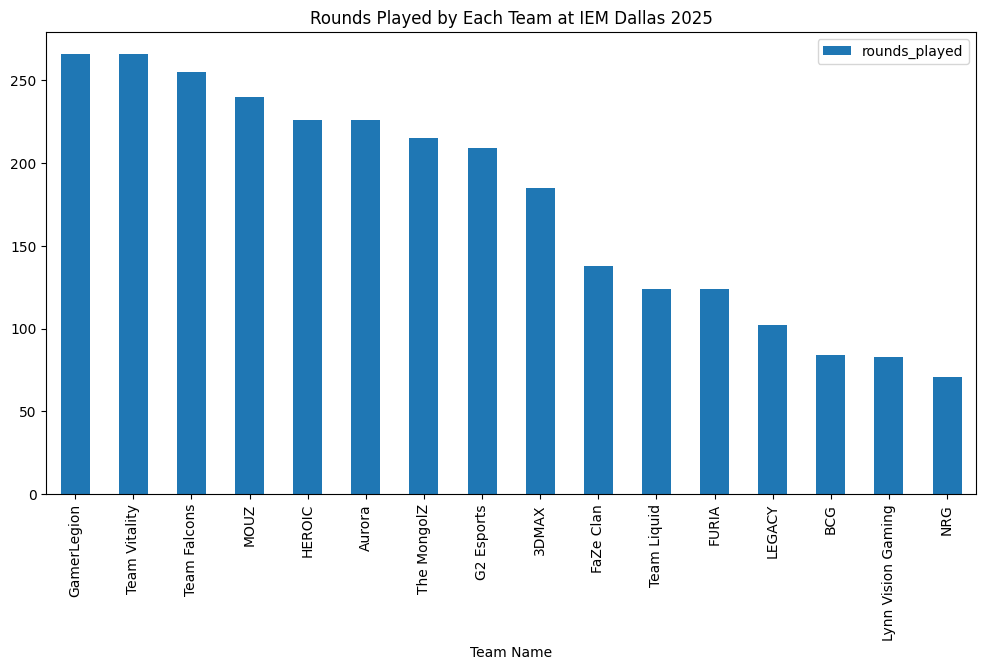

In [19]:
rounds_per_team = demos.groupby('team_name')['round_id'].nunique().to_frame().reset_index()
rounds_per_team.columns = ['team_name', 'rounds_played']
rounds_per_team = rounds_per_team.sort_values(by='rounds_played', ascending=False)

rounds_per_team.plot.bar(x='team_name', y='rounds_played', title='Rounds Played by Each Team at IEM Dallas 2025', figsize=(12, 6))
plt.pyplot.xlabel('Team Name')

Round Winrate

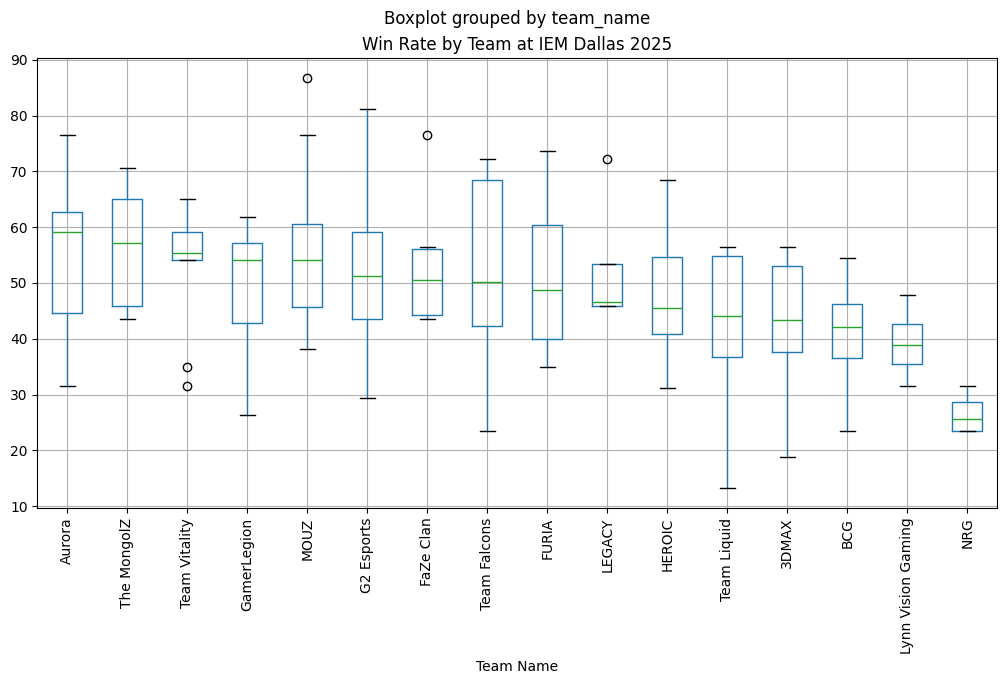

In [25]:
total_rounds_per_map_df = demos.groupby(['team_name', 'map_id'])['round_id'].nunique().to_frame().reset_index()
total_rounds_per_map_df.columns = ['team_name', 'map_id', 'total_rounds']

total_round_wins_df = demos.loc[((demos['team_name'] == demos['round_ct_team']) & (demos['round_result'] == 'CT')) | ((demos['team_name'] != demos['round_ct_team']) & (demos['round_result'] == 'T'))]
total_round_wins_per_map = total_round_wins_df.groupby(['team_name', 'map_id'])['round_id'].nunique().to_frame().reset_index()

total_round_wins_per_map.columns = ['team_name', 'map_id', 'round_wins']

winrate_df = pd.merge(total_rounds_per_map_df, total_round_wins_per_map, on = ['team_name', 'map_id'])
winrate_df['win_rate_percent'] = winrate_df['round_wins'] / winrate_df['total_rounds'] * 100

# Sort teams by median win rate
median_winrate = winrate_df.groupby('team_name')['win_rate_percent'].median().sort_values(ascending=False)
ordered_teams = median_winrate.index.tolist()
winrate_df['team_name'] = pd.Categorical(winrate_df['team_name'], categories=ordered_teams, ordered=True)

winrate_df.sort_values('team_name', inplace=True)
winrate_df.boxplot(column='win_rate_percent', by='team_name', figsize=(12, 6))
plt.pyplot.title('Win Rate by Team at IEM Dallas 2025')
plt.pyplot.xticks(rotation=90)
plt.pyplot.xlabel('Team Name')
plt.pyplot.show()

Average Kills per Round

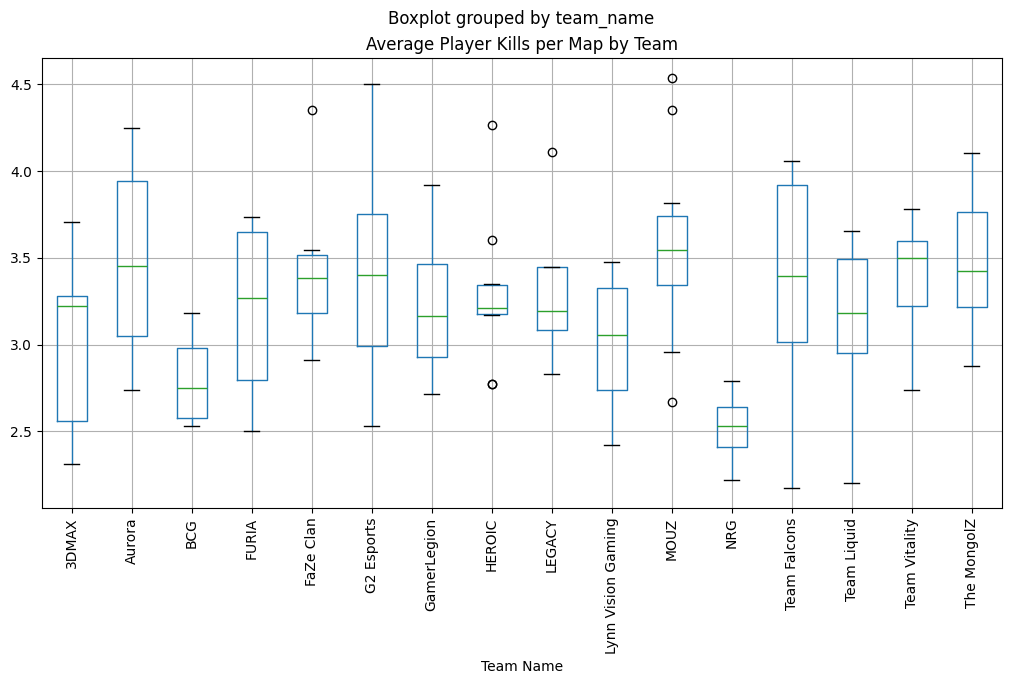

In [20]:
kills_per_map_per_team_df = demos.groupby(['team_name', 'map_id'])['player_kills'].sum().to_frame().reset_index()


ave_kills_per_map_per_team_df = pd.merge(kills_per_map_per_team_df, total_rounds_per_map_df, on=['team_name', 'map_id'])
ave_kills_per_map_per_team_df['average_player_kills_per_map'] = ave_kills_per_map_per_team_df['player_kills'] / ave_kills_per_map_per_team_df['total_rounds']


ave_kills_per_map_per_team_df.boxplot('average_player_kills_per_map', by='team_name', figsize=(12, 6))
plt.pyplot.title('Average Player Kills per Map by Team')
plt.pyplot.xticks(rotation=90)
plt.pyplot.xlabel('Team Name')
plt.pyplot.show()


Average Deaths per Round

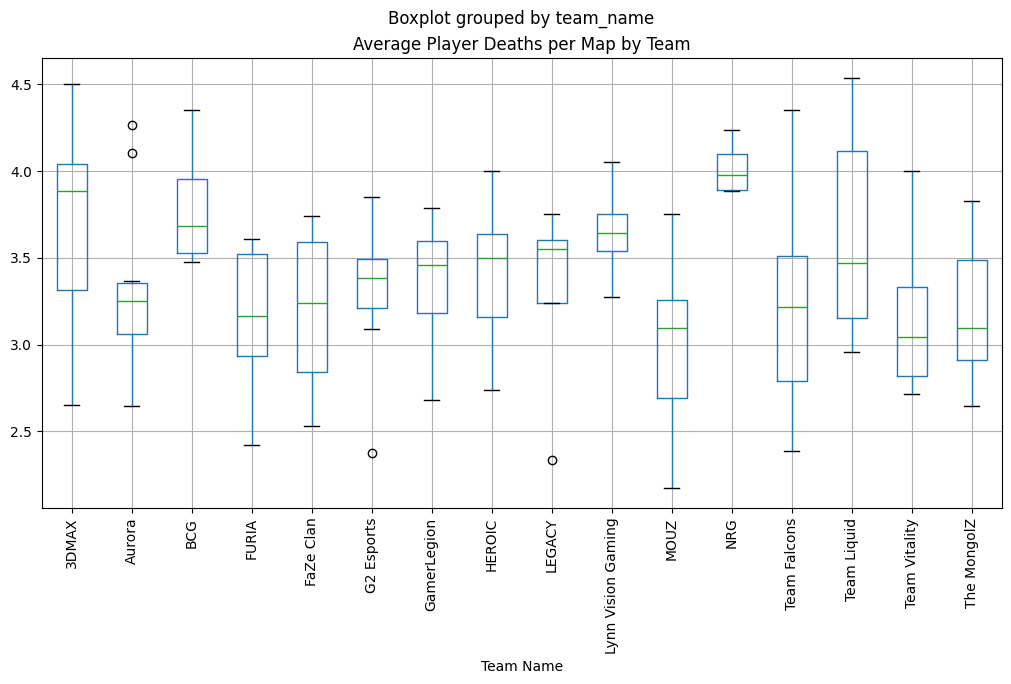

In [21]:
deaths_per_map_per_team_df = demos.loc[demos['player_died'] == True].groupby(['team_name', 'map_id'])['player_died'].count().to_frame()

average_deaths_per_map_per_team_df = pd.merge(deaths_per_map_per_team_df, total_rounds_per_map_df, on=['team_name', 'map_id'])
average_deaths_per_map_per_team_df['average_player_deaths_per_map'] = average_deaths_per_map_per_team_df['player_died'] / average_deaths_per_map_per_team_df['total_rounds']

average_deaths_per_map_per_team_df.boxplot('average_player_deaths_per_map', by='team_name', figsize=(12, 6))
plt.pyplot.title('Average Player Deaths per Map by Team')
plt.pyplot.xticks(rotation=90)
plt.pyplot.xlabel('Team Name')
plt.pyplot.show()


Average rounds as T and CT

In [22]:
total_rounds_as_ct_df = demos.loc[demos['round_ct_team'] == demos['team_name']]
total_rounds_as_ct_df = total_rounds_as_ct_df.groupby(['team_name'])['round_id'].nunique().to_frame().reset_index()
total_rounds_as_ct_df.columns = ['team_name', 'total_rounds_as_ct']

average_rounds_as_ct_df = pd.merge(total_rounds_as_ct_df, rounds_per_team, on='team_name')
average_rounds_as_ct_df['average_rounds_as_ct'] = average_rounds_as_ct_df['total_rounds_as_ct'] / average_rounds_as_ct_df['rounds_played']

average_rounds_as_ct_df.sort_values(by='average_rounds_as_ct', ascending=False, inplace=True)



In [23]:

total_rounds_as_t_df = demos.loc[demos['round_ct_team'] != demos['team_name']]
total_rounds_as_t_df = total_rounds_as_t_df.groupby(['team_name'])['round_id'].nunique().to_frame().reset_index()
total_rounds_as_t_df.columns = ['team_name', 'total_rounds_as_t']

average_rounds_as_t_df = pd.merge(total_rounds_as_t_df, rounds_per_team, on='team_name')
average_rounds_as_t_df['average_rounds_as_t'] = average_rounds_as_t_df['total_rounds_as_t'] / average_rounds_as_t_df['rounds_played']

average_rounds_as_t_df.sort_values(by='average_rounds_as_t', ascending=False, inplace=True)




<Axes: xlabel='team_name'>

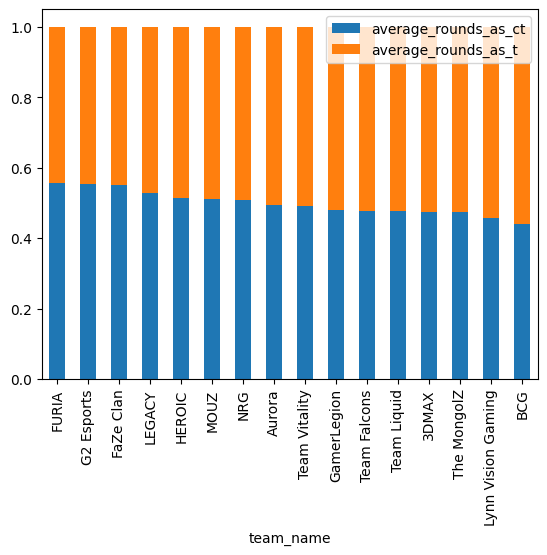

In [24]:
overall_average_rounds_df = pd.merge(average_rounds_as_ct_df, average_rounds_as_t_df, on='team_name')
overall_average_rounds_df.index = overall_average_rounds_df['team_name']
overall_average_rounds_df[['average_rounds_as_ct', 'average_rounds_as_t']].plot(kind='bar', stacked=True)

Average Flashes per Game

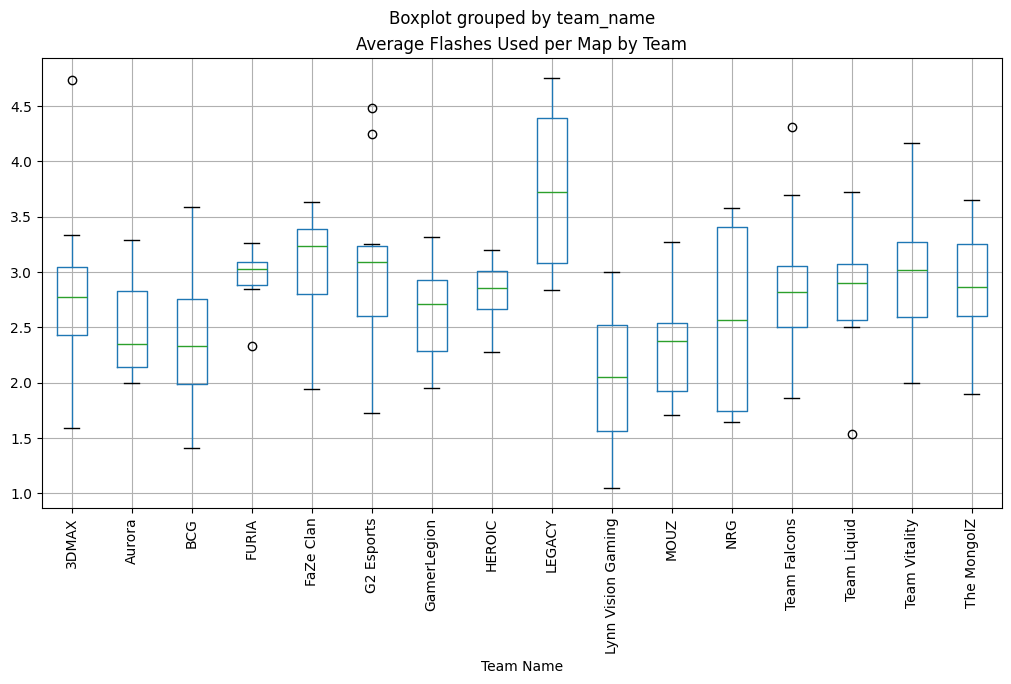

In [25]:
flashes_per_game_df = demos.groupby(['team_name', 'map_id'])['player_flashes_used'].sum()

ave_flashes_per_map_per_team_df = pd.merge(flashes_per_game_df, total_rounds_per_map_df, on=['team_name', 'map_id'])
ave_flashes_per_map_per_team_df['average_flashes_per_map'] = ave_flashes_per_map_per_team_df['player_flashes_used'] / ave_flashes_per_map_per_team_df['total_rounds']

ave_flashes_per_map_per_team_df.boxplot('average_flashes_per_map', by='team_name', figsize=(12, 6))
plt.pyplot.xticks(rotation=90)
plt.pyplot.title('Average Flashes Used per Map by Team')
plt.pyplot.xlabel('Team Name')
plt.pyplot.show()

Average Smoke Grenades per Game

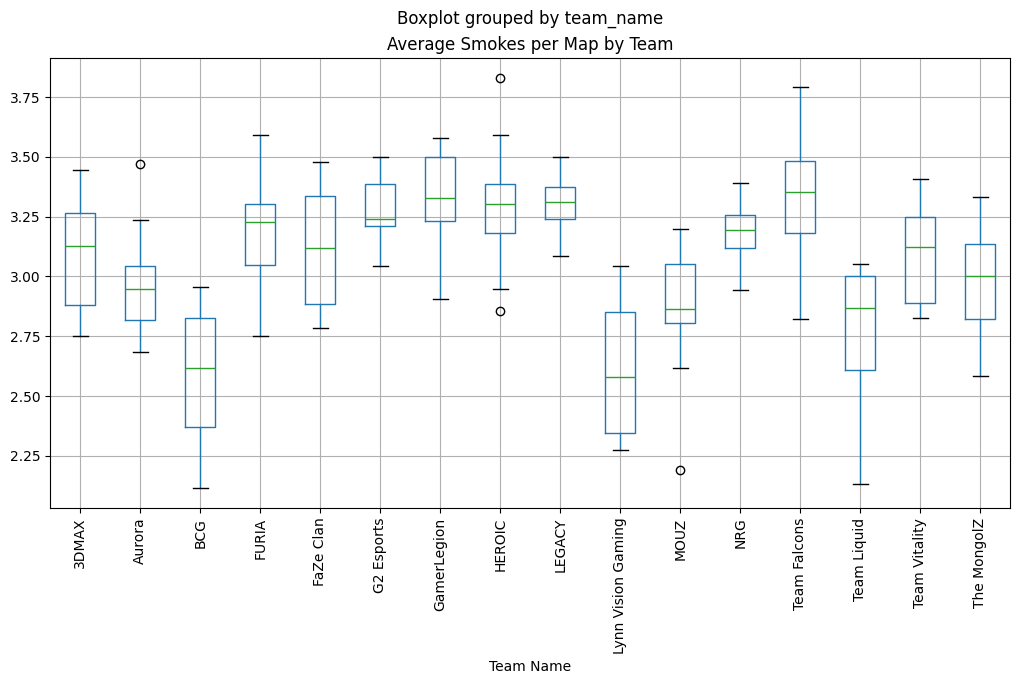

In [26]:
smokes_per_game_df = demos.groupby(['team_name', 'map_id'])['player_smokes_used'].sum()

ave_smokes_per_map_per_team_df = pd.merge(smokes_per_game_df, total_rounds_per_map_df, on=['team_name', 'map_id'])
ave_smokes_per_map_per_team_df['average_smokes_per_map'] = ave_smokes_per_map_per_team_df['player_smokes_used'] / ave_smokes_per_map_per_team_df['total_rounds']

ave_smokes_per_map_per_team_df.boxplot('average_smokes_per_map', by='team_name', figsize=(12, 6))
plt.pyplot.title('Average Smokes per Map by Team')
plt.pyplot.xticks(rotation=90)
plt.pyplot.xlabel('Team Name')
plt.pyplot.show()

Average Incendiaries per Game

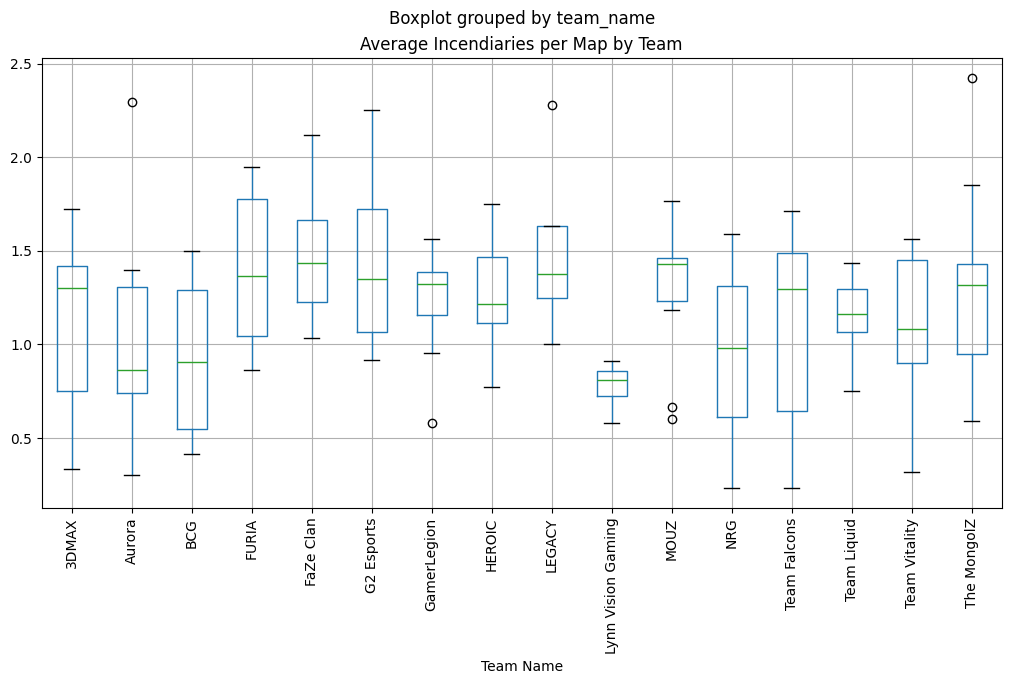

In [27]:
incendiaries_per_game_df = demos.groupby(['team_name', 'map_id'])['player_incendiaries_used'].sum()

ave_incendiaries_per_map_per_team_df = pd.merge(incendiaries_per_game_df, total_rounds_per_map_df, on=['team_name', 'map_id'])
ave_incendiaries_per_map_per_team_df['average_incendiaries_per_map'] = ave_incendiaries_per_map_per_team_df['player_incendiaries_used'] / ave_incendiaries_per_map_per_team_df['total_rounds']

ave_incendiaries_per_map_per_team_df.boxplot('average_incendiaries_per_map', by='team_name', figsize=(12, 6))
plt.pyplot.title('Average Incendiaries per Map by Team')
plt.pyplot.xticks(rotation=90)
plt.pyplot.xlabel('Team Name')
plt.pyplot.show()

Average Grenades per Game

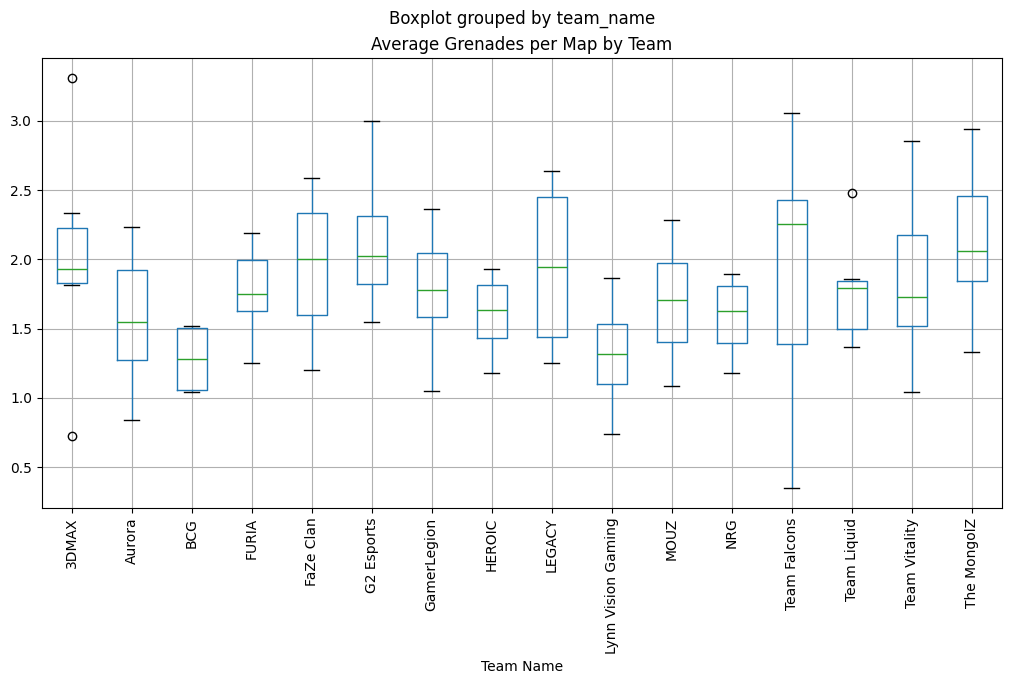

In [28]:
grenades_per_game_df = demos.groupby(['team_name', 'map_id'])['player_grenades_used'].sum()

ave_grenades_per_map_per_team_df = pd.merge(grenades_per_game_df, total_rounds_per_map_df, on=['team_name', 'map_id'])
ave_grenades_per_map_per_team_df['average_grenades_per_map'] = ave_grenades_per_map_per_team_df['player_grenades_used'] / ave_grenades_per_map_per_team_df['total_rounds']

ave_grenades_per_map_per_team_df.boxplot('average_grenades_per_map', by='team_name', figsize=(12, 6))
plt.pyplot.title('Average Grenades per Map by Team')
plt.pyplot.xticks(rotation=90)
plt.pyplot.xlabel('Team Name')
plt.pyplot.show()

Average Molotovs per Game

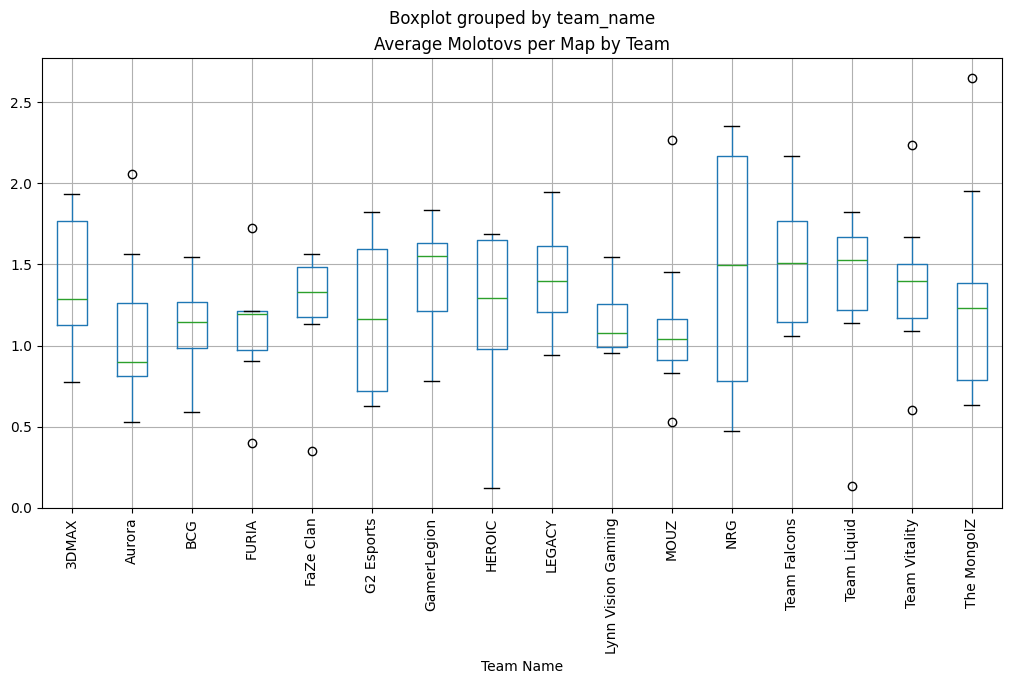

In [29]:
molotovs_per_game_df = demos.groupby(['team_name', 'map_id'])['player_molotovs_used'].sum()

ave_molotovs_per_map_per_team_df = pd.merge(molotovs_per_game_df, total_rounds_per_map_df, on=['team_name', 'map_id'])
ave_molotovs_per_map_per_team_df['average_molotovs_per_map'] = ave_molotovs_per_map_per_team_df['player_molotovs_used'] / ave_molotovs_per_map_per_team_df['total_rounds']

ave_molotovs_per_map_per_team_df.boxplot('average_molotovs_per_map', by='team_name', figsize=(12, 6))
plt.pyplot.title('Average Molotovs per Map by Team')
plt.pyplot.xticks(rotation=90)
plt.pyplot.xlabel('Team Name')
plt.pyplot.show()

The visualizations of key team metrics show that different teams have wildly varied metrics. One might infer that this is due to uneven amount of matches/rounds played due to the tournament format, but all of our analysis and visualizations are averaged to the amount of rounds/games each team played, rather than the amount of rounds/games overall.  Surprisingly, some teams have a bias on which utilities to use, while some teams are adaptable to the strategies, as shown by spread amount of average utility usage. For some metrics, such as average kills and deaths, it has been expected to be quite balanced in the context that there will be teams who would have higher kills stats, and that there will be teams with higher death stats. Overall, the EDA for the teams revealed possible key metrics to use for MCO2, as there are some metrics that are very much varied among the teams

### Players - Exploratory Data Analysis
#### EDA Question 2: What observations can be formed from the visualizations of the aggregate metrics of players at IEM Dallas 2025?

### Average Kills of Each Player Throughout the Tournament

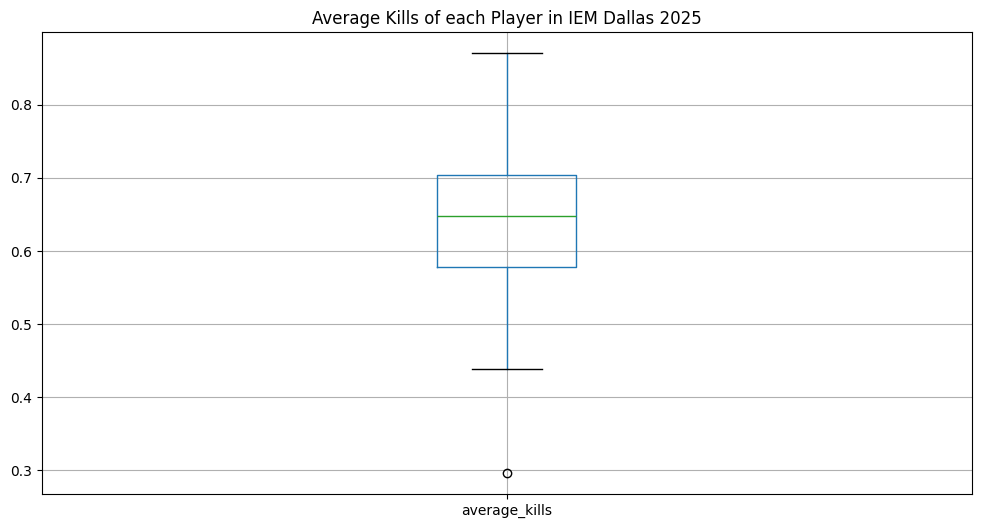

In [30]:
total_kills_per_player = demos.groupby("player_name")["player_kills"].sum()

total_rounds_per_player = demos.groupby("player_name")["round_id"].nunique().to_frame().reset_index()
total_rounds_per_player.rename(columns={"round_id": "total_rounds"}, inplace=True)


overall_average_kills_per_player_df = pd.merge(total_kills_per_player, total_rounds_per_player, on="player_name")
overall_average_kills_per_player_df['average_kills'] = overall_average_kills_per_player_df["player_kills"] / overall_average_kills_per_player_df["total_rounds"]


overall_average_kills_per_player_df.boxplot('average_kills', figsize=(12, 6))
plt.pyplot.title("Average Kills of each Player in IEM Dallas 2025")
plt.pyplot.show()



### Average Deaths of each Player in IEM Dallas 2025

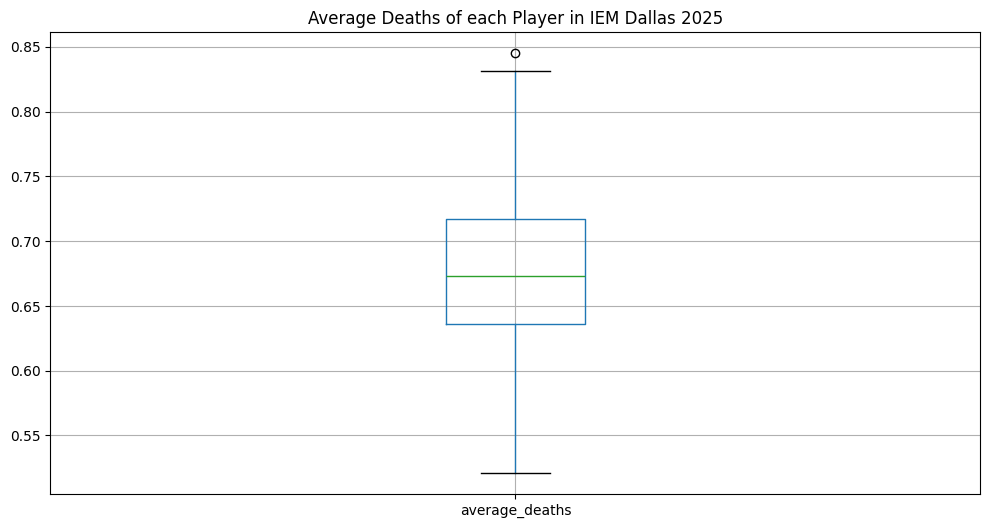

In [31]:
total_deaths_per_player = demos.loc[demos['player_died'] == True].groupby('player_name')['player_died'].count().to_frame()
total_deaths_per_player.rename(columns={'player_died': 'total_deaths'}, inplace=True)

overall_average_deaths_per_player_df = pd.merge(total_deaths_per_player, total_rounds_per_player, on="player_name")
overall_average_deaths_per_player_df['average_deaths'] = overall_average_deaths_per_player_df["total_deaths"] / overall_average_deaths_per_player_df["total_rounds"]

overall_average_deaths_per_player_df.boxplot('average_deaths', figsize=(12, 6))
plt.pyplot.title("Average Deaths of each Player in IEM Dallas 2025")
plt.pyplot.show()

### Player Spending

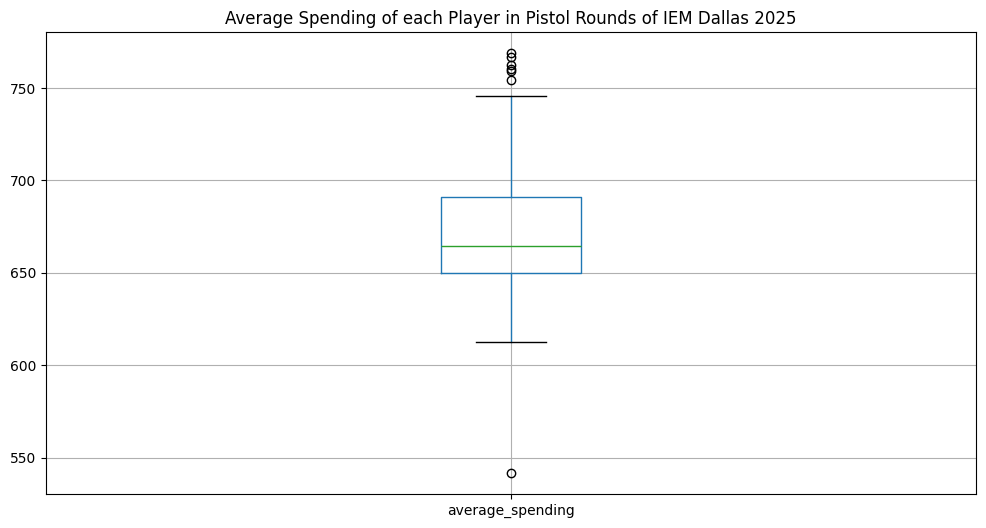

In [32]:
overall_spending_per_player_pistol_round = demos.loc[demos['round_number'] == 1].groupby('player_name')['player_spent_amount'].sum().to_frame()

total_pistol_rounds_per_player = demos.loc[demos['round_number'] == 1].groupby('player_name')['round_id'].nunique().to_frame().reset_index()
total_pistol_rounds_per_player.rename(columns={"round_id": "total_pistol"}, inplace=True)

overall_spending_per_player_pistol_round = pd.merge(overall_spending_per_player_pistol_round, total_pistol_rounds_per_player, on="player_name")
overall_spending_per_player_pistol_round['average_spending'] = overall_spending_per_player_pistol_round["player_spent_amount"] / overall_spending_per_player_pistol_round["total_pistol"]
overall_spending_per_player_pistol_round["round_type"] = "Pistol Round"

overall_spending_per_player_pistol_round.boxplot('average_spending', figsize=(12, 6))
plt.pyplot.title("Average Spending of each Player in Pistol Rounds of IEM Dallas 2025")
plt.pyplot.show()


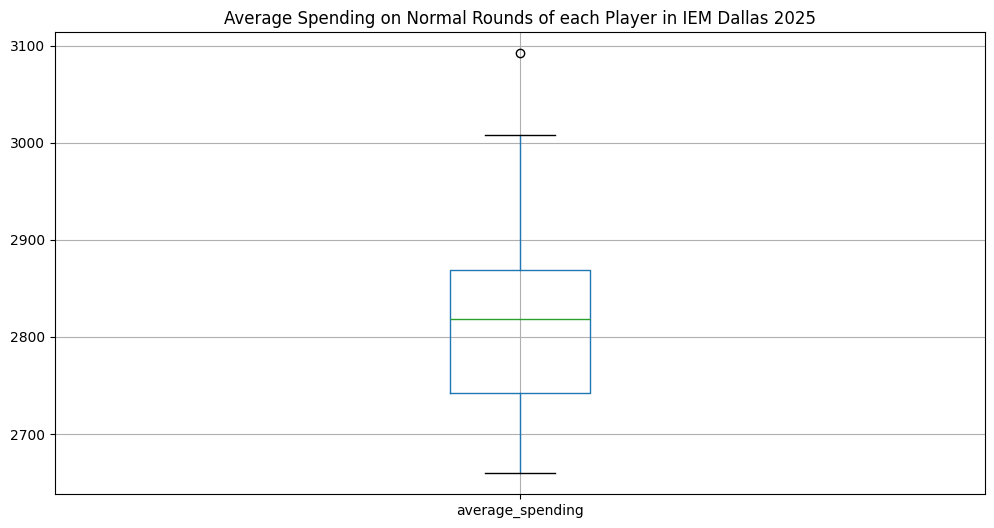

In [33]:
overall_spending_per_player_not_pistol_round = demos.loc[demos['round_number'] > 1].groupby('player_name')['player_spent_amount'].sum().to_frame()

total_rounds_per_player_not_pistol_round = demos.loc[demos['round_number'] > 1].groupby('player_name')['round_id'].nunique().to_frame().reset_index()
total_rounds_per_player_not_pistol_round.rename(columns={"round_id": "total_rounds"}, inplace=True)

overall_spending_per_player_not_pistol_round = pd.merge(overall_spending_per_player_not_pistol_round, total_rounds_per_player_not_pistol_round, on="player_name")
overall_spending_per_player_not_pistol_round['average_spending'] = overall_spending_per_player_not_pistol_round["player_spent_amount"] / overall_spending_per_player_not_pistol_round["total_rounds"]
overall_spending_per_player_not_pistol_round["round_type"] = "Normal Round"

overall_spending_per_player_not_pistol_round.boxplot('average_spending', figsize=(12, 6))
plt.pyplot.title("Average Spending on Normal Rounds of each Player in IEM Dallas 2025")
plt.pyplot.show()


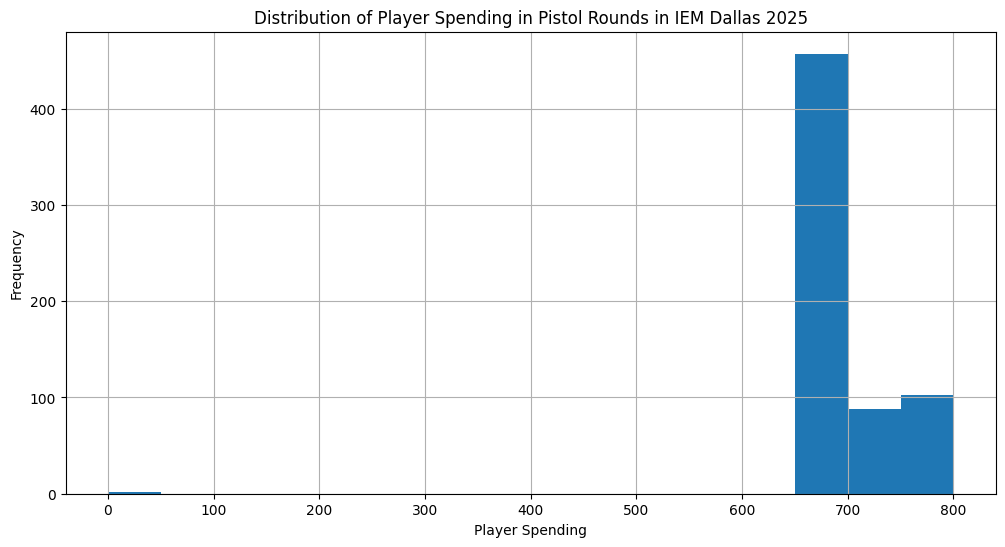

In [34]:
player_spending_pistol_rounds_df = demos.loc[demos['round_number'] == 1]

player_spending_pistol_rounds_df['player_spent_amount'].hist(bins=16, figsize=(12, 6))
plt.pyplot.title("Distribution of Player Spending in Pistol Rounds in IEM Dallas 2025")
plt.pyplot.xlabel("Player Spending")
plt.pyplot.ylabel("Frequency")
plt.pyplot.show()

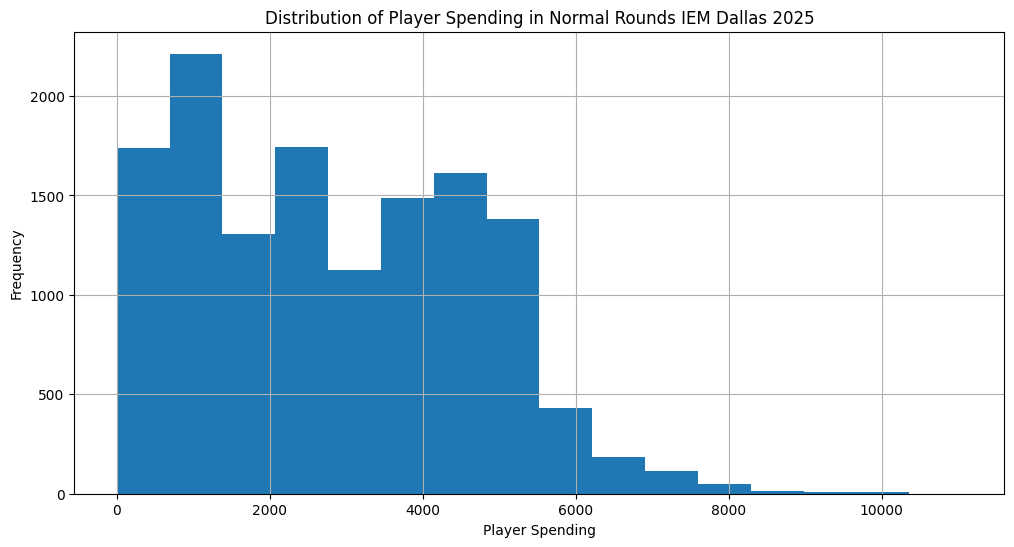

In [35]:
player_spending_not_pistol_rounds_df = demos.loc[demos['round_number'] > 1]

player_spending_not_pistol_rounds_df['player_spent_amount'].hist(bins=16, figsize=(12, 6))
plt.pyplot.title("Distribution of Player Spending in Normal Rounds IEM Dallas 2025")
plt.pyplot.xlabel("Player Spending")
plt.pyplot.ylabel("Frequency")
plt.pyplot.show()

#### Average Utilities Usage of Players Per Round

In [36]:
incendiaries_per_player_df = demos.groupby(['player_name'])['player_incendiaries_used'].sum()
incendiaries_per_player_df = incendiaries_per_player_df.to_frame().reset_index()
incendiaries_per_player_df.rename(columns={"player_incendiaries_used": "total_incendiaries"}, inplace=True)

total_rounds_per_player_df = demos.groupby(['player_name'])['round_id'].nunique().to_frame().reset_index()
total_rounds_per_player_df.rename(columns={"round_id": "total_rounds"}, inplace=True)

average_incendiaries_per_player_df = pd.merge(incendiaries_per_player_df, total_rounds_per_player_df, on=['player_name'])
average_incendiaries_per_player_df['average_incendiaries'] = average_incendiaries_per_player_df["total_incendiaries"] / average_incendiaries_per_player_df["total_rounds"]

In [37]:
flash_per_player_df = demos.groupby(['player_name'])['player_flashes_used'].sum()
flash_per_player_df = flash_per_player_df.to_frame().reset_index()
flash_per_player_df.rename(columns={"player_flashes_used": "total_flash"}, inplace=True)

average_flash_per_player_df = pd.merge(flash_per_player_df, total_rounds_per_player_df, on=['player_name'])
average_flash_per_player_df['average_flash'] = average_flash_per_player_df["total_flash"] / average_flash_per_player_df["total_rounds"]


In [38]:
smokes_per_player_df = demos.groupby(['player_name'])['player_smokes_used'].sum()
smokes_per_player_df = smokes_per_player_df.to_frame().reset_index()
smokes_per_player_df.rename(columns={"player_smokes_used": "total_smokes"}, inplace=True)

average_smokes_per_player_df = pd.merge(smokes_per_player_df, total_rounds_per_player_df, on=['player_name'])
average_smokes_per_player_df['average_smokes'] = average_smokes_per_player_df["total_smokes"] / average_smokes_per_player_df["total_rounds"]


In [39]:
grenades_per_player_df = demos.groupby(['player_name'])['player_grenades_used'].sum()
grenades_per_player_df = grenades_per_player_df.to_frame().reset_index()
grenades_per_player_df.rename(columns={"player_grenades_used": "total_grenades"}, inplace=True)

average_grenades_per_player_df = pd.merge(grenades_per_player_df, total_rounds_per_player_df, on=['player_name'])
average_grenades_per_player_df['average_grenades'] = average_grenades_per_player_df["total_grenades"] / average_grenades_per_player_df["total_rounds"]


In [40]:
molotovs_per_player_df = demos.groupby(['player_name'])['player_molotovs_used'].sum()
molotovs_per_player_df = molotovs_per_player_df.to_frame().reset_index()
molotovs_per_player_df.rename(columns={"player_molotovs_used": "total_molotovs"}, inplace=True)

average_molotovs_per_player_df = pd.merge(molotovs_per_player_df, total_rounds_per_player_df, on=['player_name'])
average_molotovs_per_player_df['average_molotovs'] = average_molotovs_per_player_df["total_molotovs"] / average_molotovs_per_player_df["total_rounds"]


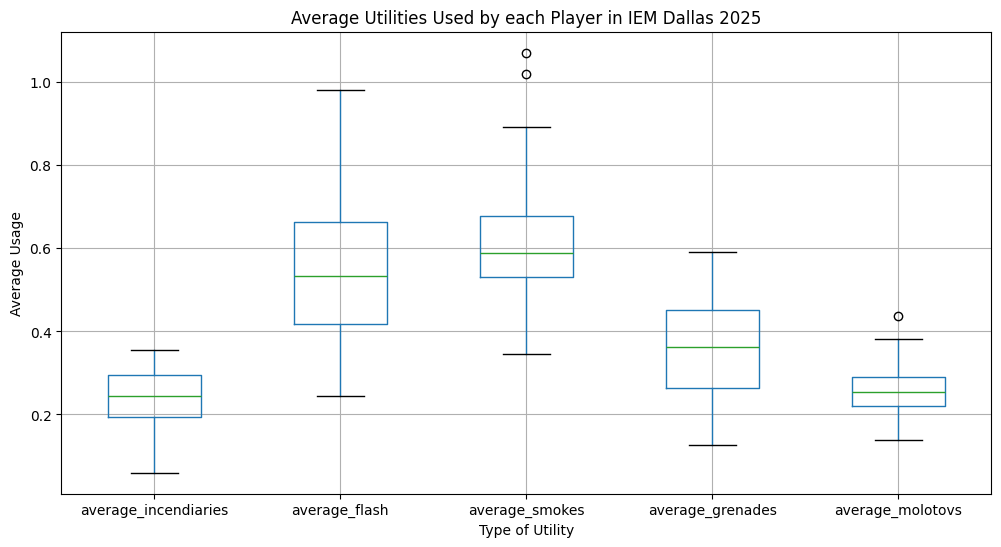

In [41]:
overall_utilities_per_player_df = pd.merge(average_incendiaries_per_player_df, average_flash_per_player_df, on=['player_name', 'total_rounds'])
overall_utilities_per_player_df = pd.merge(overall_utilities_per_player_df, average_smokes_per_player_df, on=['player_name', 'total_rounds'])
overall_utilities_per_player_df = pd.merge(overall_utilities_per_player_df, average_grenades_per_player_df, on=['player_name', 'total_rounds'])
overall_utilities_per_player_df = pd.merge(overall_utilities_per_player_df, average_molotovs_per_player_df, on=['player_name', 'total_rounds'])

overall_utilities_per_player_df.boxplot(['average_incendiaries', 'average_flash', 'average_smokes', 'average_grenades', 'average_molotovs'], figsize=(12, 6))
plt.pyplot.title("Average Utilities Used by each Player in IEM Dallas 2025")
plt.pyplot.xlabel("Type of Utility")
plt.pyplot.ylabel("Average Usage")
plt.pyplot.show()

In terms of the general player stats, most of the data gathered is well within expectations. For example, due to strategic setups, smokes are more heavily favored than other counterparts. The low usage of incendiaries and molotovs are to be expected as well, since both are exclusive to one side (incendiary to Counter-Terrorist, molotovs to Terrorist). Another expected observation to make is that the player spending on normal rounds is skewed to the left since if you win a round, you get to keep your weapons, and the only necessities you need to buy are utilities. Despite the expected data, there are still unexpected observations. One of which is the wide spread in terms of flash and smokes usage, which may be a key factor for a round win to be studied on MCO2

### Maps - Exploratory Data Analysis
#### EDA Question #3: What specific metrics are influenced by maps?

### Average Win Rate as T on Each Map

<Axes: title={'center': 'T Win Rate per Map'}, xlabel='Map Name', ylabel='T Win Rate (%)'>

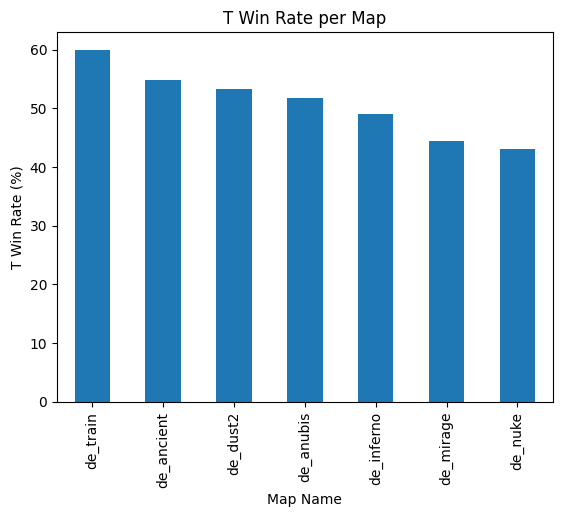

In [42]:
total_rounds_per_map_name_df = demos.groupby('map_name')['round_id'].nunique().to_frame().reset_index()
total_rounds_per_map_name_df.columns = ['map_name', 'total_rounds']

t_wins_per_map_df = demos.loc[(demos['round_result'] == "T") & (demos['team_name'] != demos['round_ct_team'])]
t_wins_per_map_df = t_wins_per_map_df.groupby( 'map_name')['round_id'].nunique().to_frame().reset_index()
t_wins_per_map_df.columns = ['map_name', 't_wins']

average_t_wins_per_map_df = pd.merge(total_rounds_per_map_name_df, t_wins_per_map_df, on=['map_name'])
average_t_wins_per_map_df['t_win_rate'] = average_t_wins_per_map_df['t_wins'] / average_t_wins_per_map_df['total_rounds'] * 100

average_t_wins_per_map_df = average_t_wins_per_map_df.sort_values(by='t_win_rate', ascending=False)
average_t_wins_per_map_df.index = average_t_wins_per_map_df['map_name']
average_t_wins_per_map_df['t_win_rate'].plot.bar(x='map_name', title='T Win Rate per Map', xlabel='Map Name', ylabel='T Win Rate (%)')

### Average Win Rate as CT on Each Map

<Axes: title={'center': 'CT Win Rate per Map'}, xlabel='Map Name', ylabel='CT Win Rate (%)'>

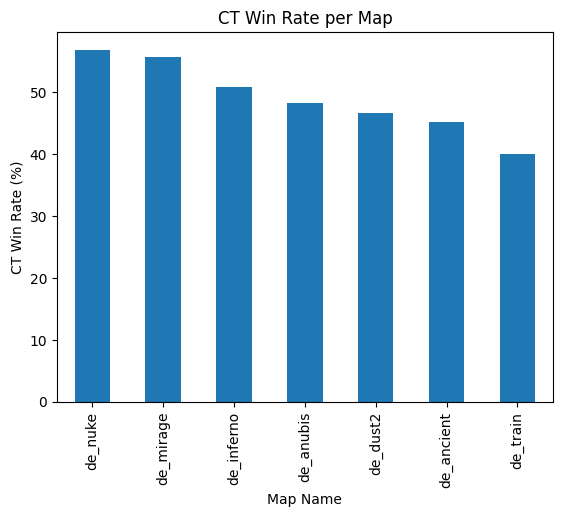

In [43]:

ct_wins_per_map_df = demos.loc[(demos['round_result'] == "CT") & (demos['team_name'] == demos['round_ct_team'])]
ct_wins_per_map_df = ct_wins_per_map_df.groupby('map_name')['round_id'].nunique().to_frame().reset_index()
ct_wins_per_map_df.columns = ['map_name', 'ct_wins']

average_ct_wins_per_map_df = pd.merge(total_rounds_per_map_name_df, ct_wins_per_map_df, on=['map_name'])
average_ct_wins_per_map_df['ct_win_rate'] = average_ct_wins_per_map_df['ct_wins'] / average_ct_wins_per_map_df['total_rounds'] * 100

average_ct_wins_per_map_df.sort_values(by="ct_win_rate", ascending=False, inplace=True)
average_ct_wins_per_map_df.index = average_ct_wins_per_map_df['map_name']
average_ct_wins_per_map_df['ct_win_rate'].plot.bar(x='map_name', title='CT Win Rate per Map', xlabel='Map Name', ylabel='CT Win Rate (%)')

### Bomb Plant rate per each Map

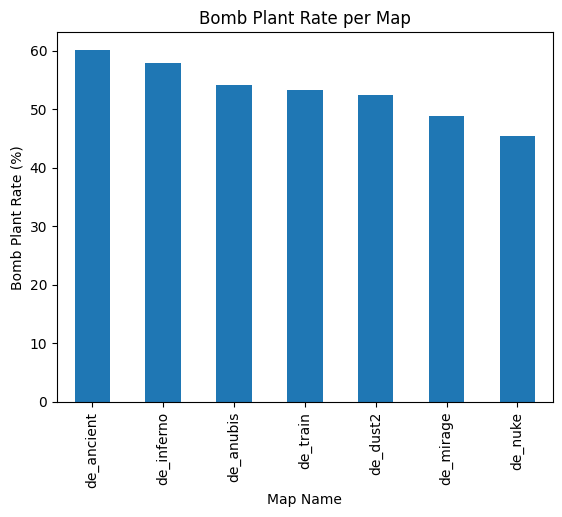

In [44]:
bomb_plants_per_map_df = demos.loc[(demos['round_bomb_plant_site'] == "A") | (demos['round_bomb_plant_site'] == "B")]

bomb_plants_per_map_df = bomb_plants_per_map_df.groupby('map_name')['round_id'].nunique().to_frame().reset_index()
bomb_plants_per_map_df.columns = ['map_name', 'bomb_plants']

average_bomb_plants_per_map_df = pd.merge(total_rounds_per_map_name_df, bomb_plants_per_map_df, on=['map_name'])
average_bomb_plants_per_map_df['bomb_plant_rate'] = average_bomb_plants_per_map_df['bomb_plants'] / average_bomb_plants_per_map_df['total_rounds'] * 100

average_bomb_plants_per_map_df.sort_values(by='bomb_plant_rate', ascending=False, inplace=True)
average_bomb_plants_per_map_df.index = average_bomb_plants_per_map_df['map_name']
average_bomb_plants_per_map_df['bomb_plant_rate'].plot.bar(x='map_name', title='Bomb Plant Rate per Map', xlabel='Map Name', ylabel='Bomb Plant Rate (%)')
plt.pyplot.show()

### Successful Defuse Rate per Map

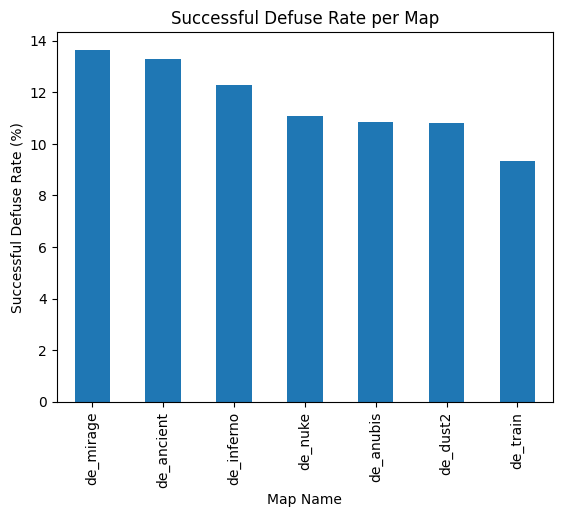

In [45]:
successful_defuses_per_map_df = demos.loc[(demos['bomb_defuse_time'] > 0)]
successful_defuses_per_map_df = successful_defuses_per_map_df.groupby('map_name')['round_id'].nunique().to_frame().reset_index()
successful_defuses_per_map_df.columns = ['map_name', 'successful_defuses']

average_successful_defuses_per_map_df = pd.merge(total_rounds_per_map_name_df, successful_defuses_per_map_df, on=['map_name'])
average_successful_defuses_per_map_df['successful_defuse_rate'] = average_successful_defuses_per_map_df['successful_defuses'] / average_successful_defuses_per_map_df['total_rounds'] * 100

average_successful_defuses_per_map_df.sort_values(by='successful_defuse_rate', ascending=False, inplace=True)
average_successful_defuses_per_map_df.index = average_successful_defuses_per_map_df['map_name']
average_successful_defuses_per_map_df['successful_defuse_rate'].plot.bar(x='map_name', title='Successful Defuse Rate per Map', xlabel='Map Name', ylabel='Successful Defuse Rate (%)')
plt.pyplot.show()


### Time Distribution of Terrorist Getting inside the Site

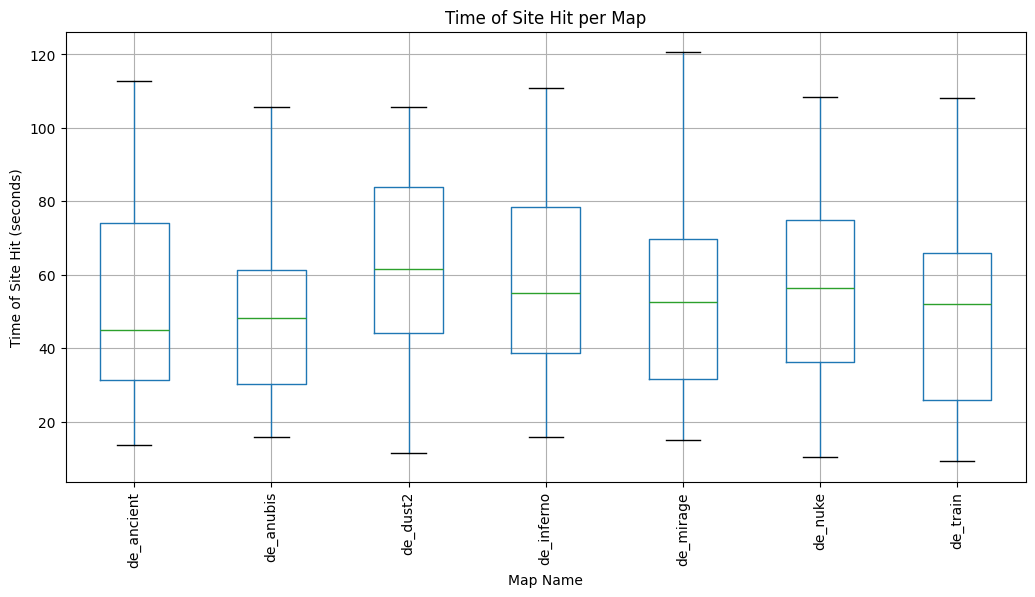

In [46]:
time_of_site_hit = demos.loc[(demos['round_site_hit_time'] > 0)]
time_of_site_hit = time_of_site_hit.groupby(['map_name', 'round_site_hit_time'])['round_id'].nunique().to_frame().reset_index()
time_of_site_hit.drop(columns=['round_id'], inplace=True)

time_of_site_hit.boxplot('round_site_hit_time', by='map_name', figsize=(12, 6))
plt.pyplot.title('Time of Site Hit per Map')
plt.pyplot.suptitle('')
plt.pyplot.xlabel('Map Name')
plt.pyplot.ylabel('Time of Site Hit (seconds)')
plt.pyplot.xticks(rotation=90)
plt.pyplot.show()


Based on the visualizations on the data, it can be said that certain maps affect key metrics heavily, which leads to favoring a certain side. For example, Nuke has the lowest Terrorist side win rate and also has a low bomb plant rate, making it a difficult map for the Terrorist Side. These biases and inclinations can be used to further study the key win indicators, which will be tackled in the next phase of the MCO

### Players - Exploratory Data Analysis
#### EDA Question #4: How does player experience relate with performance?

### Distribution of Player Experience

We start by understanding how long players have been active professionally.

**Steps:**
- Parse `proplayer_since_year` and `proplayer_since_month` into a datetime.
- Calculate `experience_months` from debut to today.
- Plot a histogram to show experience distribution.

In [47]:
# Map month names to numbers
month_map = {month: idx for idx, month in enumerate([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"], start=1)}

# Convert debut to datetime
# Note that because of the way our dataset was created, we assume that proplayer_since_day is always 1 (first day of the month) for uniformity
players["debut_date"] = pd.to_datetime(
    players["proplayer_since_year"].astype(str) + "-" +
    players["proplayer_since_month"].map(month_map).astype(str) + "-01"
)

# Compute experience in months
today = pd.Timestamp.today()
players["experience_months"] = (today.year - players.debut_date.dt.year) * 12 + \
                                  (today.month - players.debut_date.dt.month)

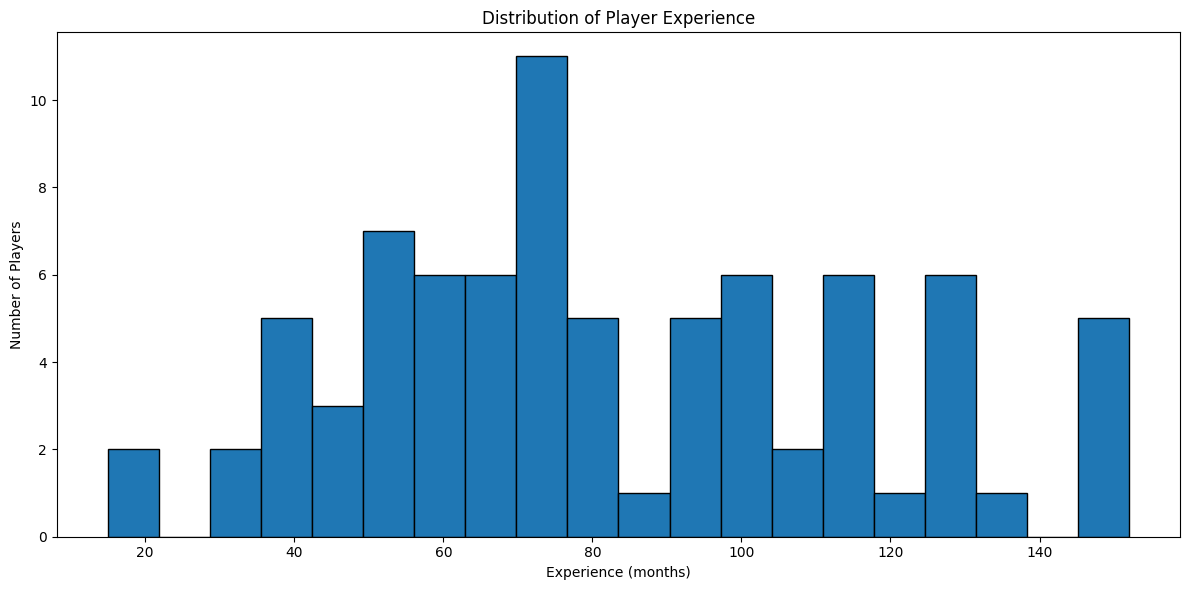

In [48]:
# Histogram
plt.pyplot.figure(figsize=(12, 6))
plt.pyplot.hist(players["experience_months"], bins=20, edgecolor='black')
plt.pyplot.xlabel("Experience (months)")
plt.pyplot.ylabel("Number of Players")
plt.pyplot.title("Distribution of Player Experience")
plt.pyplot.tight_layout()
plt.pyplot.show()

The distribution gives an idea of how veteran-heavy or newcomer-heavy the player pool is. Based on the plot, player experience spans from ~15 to over 150 months. The most common esperience range is between 60-80 months, while a small elite group exists at the far right (120-150+ months). There are also few new players (< ~30 months), suggesting a lower pro turnover or barrier to entry.

### Top 5 Most Experienced Players from Top 4 Teams

We could then identify the "elite" players from the best-performing teams.

**Steps:**
- Find the top 4 teams by `tournament_place`.
- Filter players from these teams.
- Rank by experience in months and take the top 5.

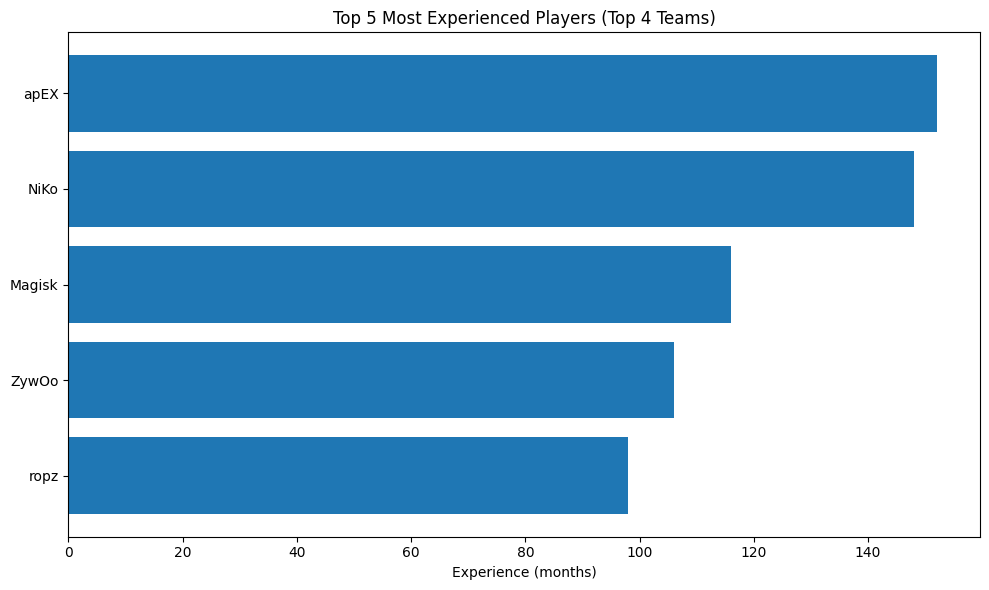

In [49]:
top_teams = teams.sort_values("tournament_place").head(4)["team_name"].tolist()
top_team_players = players[players["team"].isin(top_teams)]
top_experienced_players = top_team_players.sort_values("experience_months", ascending=False).head(5)

# Bar plot
plt.pyplot.figure(figsize=(10, 6))
plt.pyplot.barh(top_experienced_players["name"], top_experienced_players["experience_months"])
plt.pyplot.xlabel("Experience (months)")
plt.pyplot.title("Top 5 Most Experienced Players (Top 4 Teams)")
plt.pyplot.gca().invert_yaxis()
plt.pyplot.tight_layout()
plt.pyplot.show()

These players are likely key contributors to their teams’ high placements. All top players have 90-150 months of experience, showing that top-performing teams tends to have highly seasoned players.

### Player Experience vs Tournament Placement

Next, we assess whether individual player experience correlates with better team placements.

**Steps:**
- Merge player data with tournament results.
- Plot each player's experience against their team's tournament placement.
- Use `adjustText` to resolve overlapping labels.

54 [-0.64540356 -0.74198253]
59 [-0.39701877 -0.6416076 ]


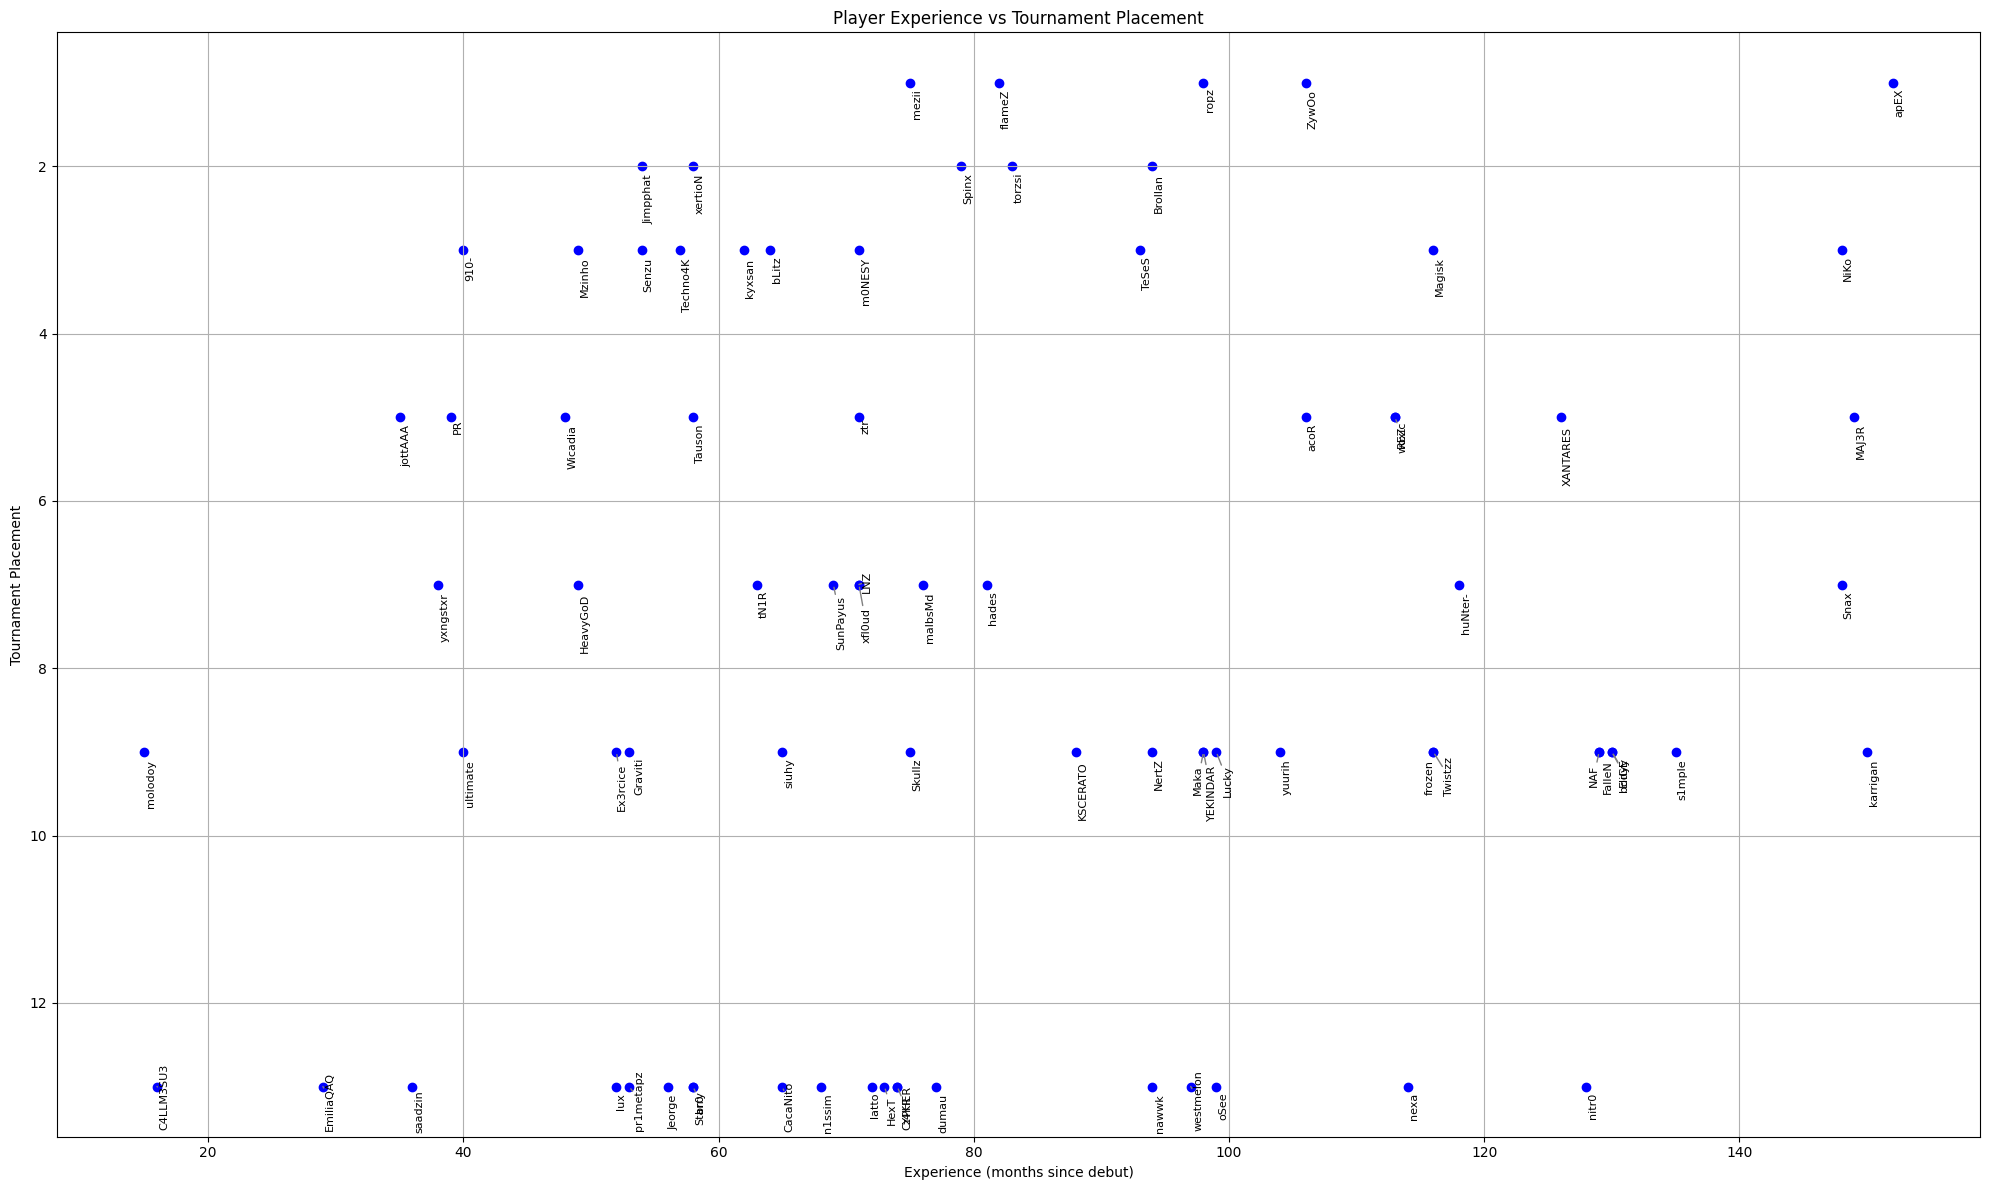

In [50]:
df = players.merge(teams, left_on="team", right_on="team_name")

# Scatterplot
plt.pyplot.figure(figsize=(20, 12))
plt.pyplot.scatter(df["experience_months"], df["tournament_place"], color="blue")
texts = [
    plt.pyplot.text(row["experience_months"], row["tournament_place"], row["name"], fontsize=8, rotation=90)
    for _, row in df.iterrows()
]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))
plt.pyplot.gca().invert_yaxis()
plt.pyplot.xlabel("Experience (months since debut)")
plt.pyplot.ylabel("Tournament Placement")
plt.pyplot.title("Player Experience vs Tournament Placement")
plt.pyplot.grid(True)
plt.pyplot.tight_layout()
plt.pyplot.show()

This helps spot whether highly experienced players tend to place higher or not. At a first glance, there is no strong linear correlation, but several surface-level observations can be made: 1) Some of the most experienced players (e.g. apEX, NiKo, Magisk) are associated with top placements. 2) Newer players (~<40 months) often fall into lower placements (9th–13th). 3) Teams with a mix of mid-experience players (~60–100 months) tend to spread across ranks 2–8. This shows that high experience is neither necessary nor sufficient, but may be a competitive edge especially alongside team synergy.

### Team Roster Tenure vs Tournament Placement

We could also analyze how long a team’s current roster has been together and whether that impacts performance.

**Steps:**
- Convert `on_team_since` for each player.
- Get the latest join date (youngest tenure) for each team.
- Calculate months since that join date (i.e. roster tenure).
- Merge with tournament results and plot.

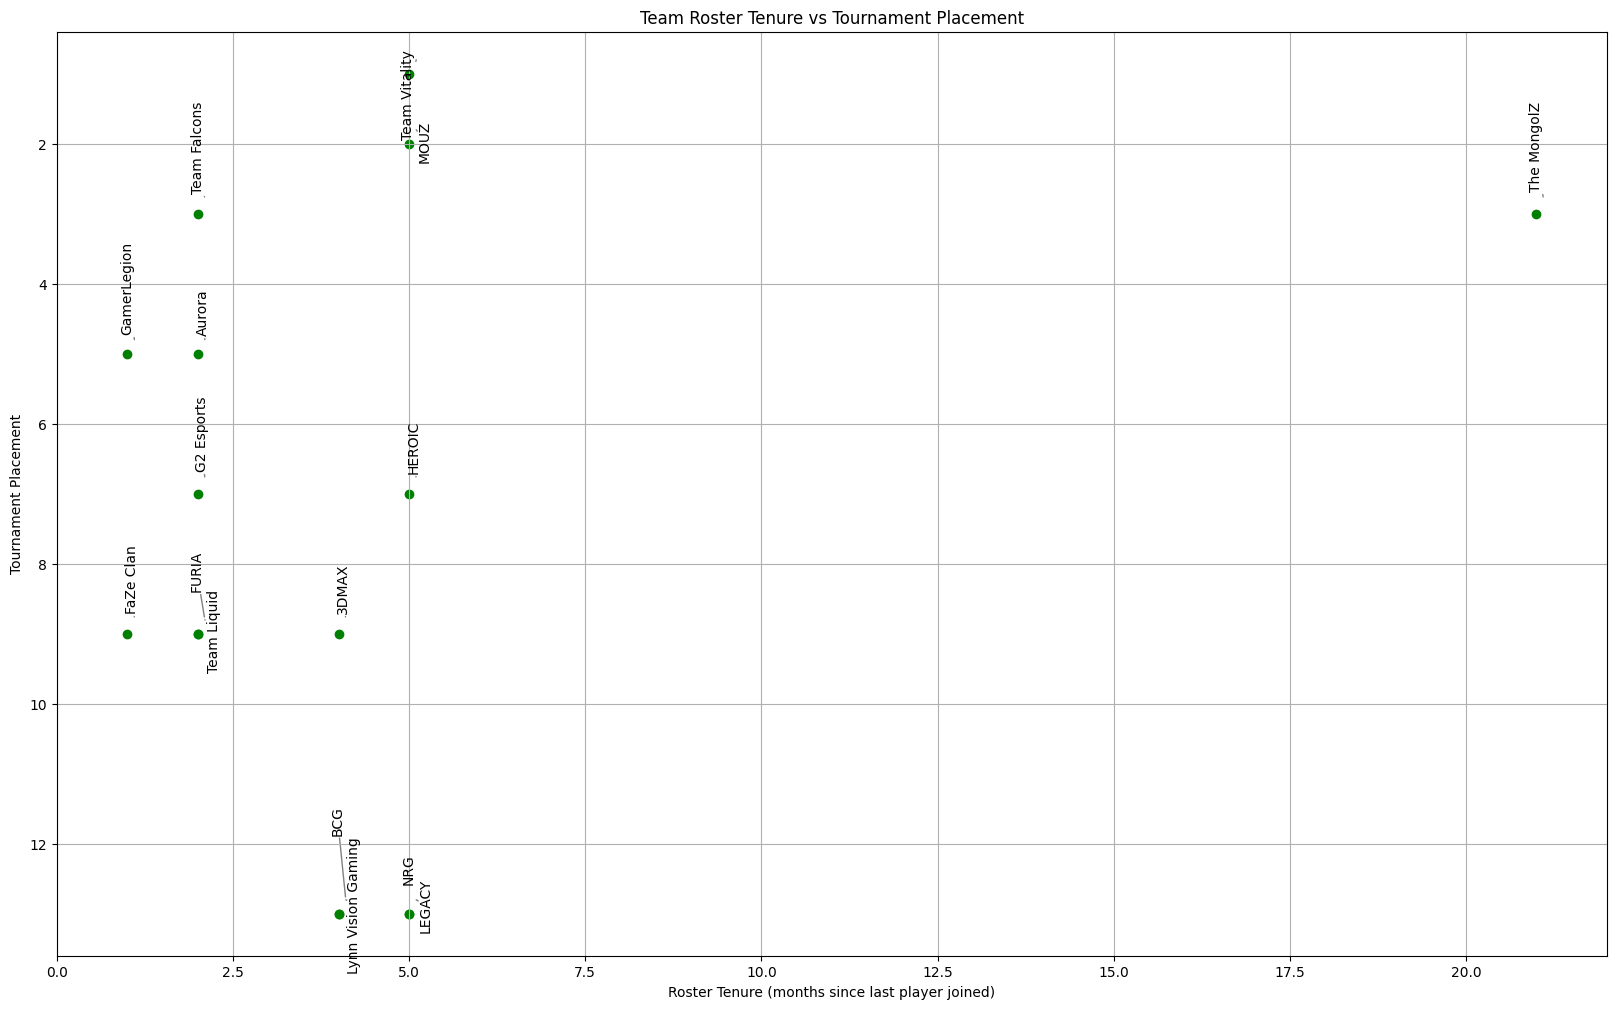

In [51]:
# Convert team join date to datetime
players["on_team_since"] = pd.to_datetime(
    players["on_team_since_year"].astype(str) + "-" +
    players["on_team_since_month"].map(month_map).astype(str) + "-01"
)

latest_join_df = players.groupby("team")["on_team_since"].max().reset_index()

# Compute roster tenure (months since newest member joined)
today = pd.Timestamp.today()
latest_join_df["roster_tenure_months"] = (today.year - latest_join_df["on_team_since"].dt.year) * 12 + \
                                          (today.month - latest_join_df["on_team_since"].dt.month)

team_df = latest_join_df.merge(teams, left_on="team", right_on="team_name")

# Scatterplot
plt.pyplot.figure(figsize=(20, 12))
plt.pyplot.scatter(team_df["roster_tenure_months"], team_df["tournament_place"], color="green")

# Note that I had to use adjust_text to avoid overlapping text labels and make the plot more readable
texts = [
    plt.pyplot.text(
                row["roster_tenure_months"] + 0.1, 
                row["tournament_place"] - 0.2, 
                row["team_name"], 
                fontsize=10, 
                rotation=90, 
                verticalalignment='top',
                horizontalalignment='center'
            )
    for _, row in team_df.iterrows()
]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

plt.pyplot.gca().invert_yaxis()
plt.pyplot.xlabel("Roster Tenure (months since last player joined)")
plt.pyplot.ylabel("Tournament Placement")
plt.pyplot.title("Team Roster Tenure vs Tournament Placement")
plt.pyplot.grid(True)
plt.pyplot.show()

Teams with stable rosters may perform better due to a stronger synergy. Most teams show no clear correlation between how long their roster has been together and how well they performed. However, one standout team with very high roster tenure (The MongolZ) secured a top 3 placement.

## AI Declaration
Statement: During the preparation of this work the author(s) used ChatGPT, and GitHub Copilot for the following purposes:

- Learn more about Pandas library

After using this tool/service, the author(s) reviewed and edited the content as needed and take(s) full responsibility for the content of the publication.